In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Display basic information
print(data.head())
print(data.info())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title  Released_Year Certificate  Runtime  \
0  The Shawshank Redemption           1994           R      142   
1             The Godfather           1972           R      175   
2           The Dark Knight           2008           R      152   
3    The Godfather: Part II           1974           R      202   
4              12 Angry Men           1957           G       96   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                   

In [4]:
# Showing the head of the dataset
data.head()

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title  Released_Year Certificate  Runtime  \
0  The Shawshank Redemption           1994           R      142   
1             The Godfather           1972           R      175   
2           The Dark Knight           2008           R      152   
3    The Godfather: Part II           1974           R      202   
4              12 Angry Men           1957           G       96   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross Genre_1 Genre_2 Genre_3  
0  William Sadler      2343110   28341469.0   Drama     NaN     NaN  
1    Diane Keaton      1620367  134966411.0   Crime   Drama     NaN  
2   Michael Caine      2303232  534858444.0  Action   Crime   Drama  
3    Diane Keaton      1129952   57300000.0   Crime   Drama     NaN  
4    John Fiedler       689845    4360000.0   Crime   Drama     NaN

In [6]:
# This line is for finding out the missing values in the dataset
missing_values = data.isna().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
Genre_1            0
Genre_2          105
Genre_3          354
dtype: int64


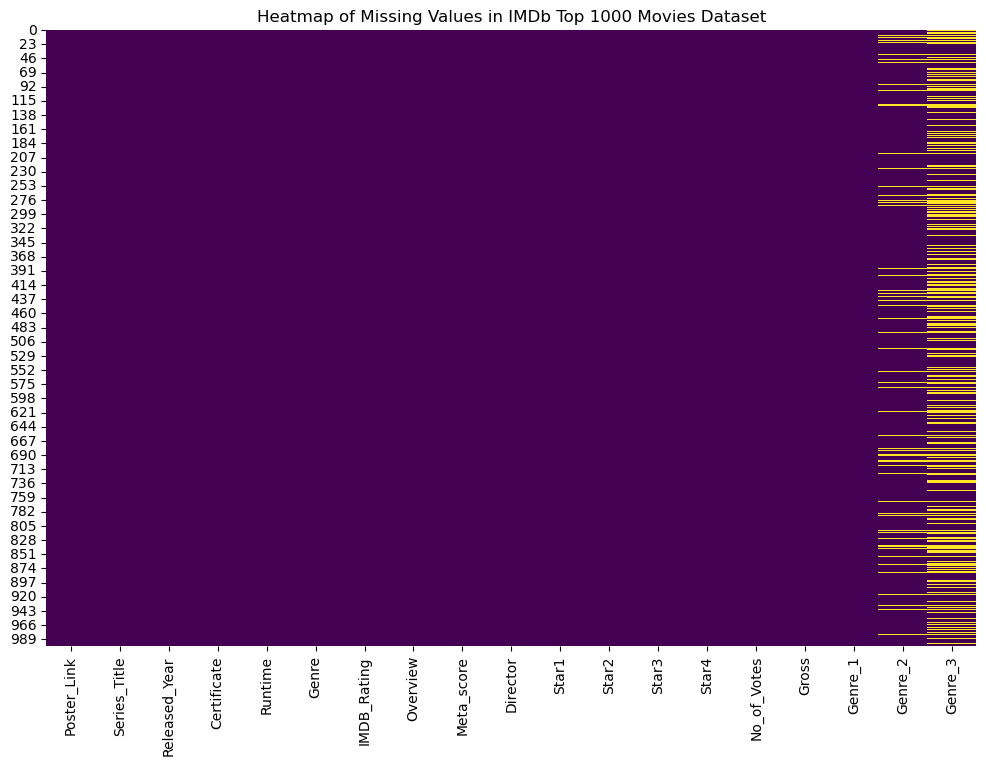

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in IMDb Top 1000 Movies Dataset')
plt.show()

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Step 1: Preprocessing
# Combine genres into a single column
data['All_Genres'] = data[['Genre_1', 'Genre_2', 'Genre_3']].fillna('').agg(' '.join, axis=1)

# Combine important features into a single string
data['Combined_Features'] = (
    data['All_Genres'] + ' ' +
    data['Director'] + ' ' +
    data['Star1'] + ' ' +
    data['Star2'] + ' ' +
    data['Star3'] + ' ' +
    data['Star4']
)

# Step 2: Vectorization
# Convert text data into numerical features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['Combined_Features'])

# Step 3: Similarity Calculation
# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 4: Recommendation Function
def recommend_movies(title, cosine_sim=cosine_sim, data=data):
    # Get the index of the movie that matches the title
    indices = pd.Series(data.index, index=data['Series_Title']).drop_duplicates()
    idx = indices[title]

    # Get similarity scores for all movies with the selected movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 similar movies (excluding itself)
    sim_scores = sim_scores[1:11]
    
    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the titles of the top 10 movies
    return data['Series_Title'].iloc[movie_indices]

# Test the recommendation system
recommended_movies = recommend_movies('The Godfather')
print("Movies similar to 'The Godfather':")
print(recommended_movies)


Movies similar to 'The Godfather':
3        The Godfather: Part II
974     The Godfather: Part III
74               Apocalypse Now
649                 The Insider
693            The Conversation
305           On the Waterfront
823         Glengarry Glen Ross
447    A Streetcar Named Desire
398            Scent of a Woman
484                The Irishman
Name: Series_Title, dtype: object


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Preprocessing
# Combine genres into a single column
data['All_Genres'] = data[['Genre_1', 'Genre_2', 'Genre_3']].fillna('').agg(' '.join, axis=1)

# Combine important features into a single string
data['Combined_Features'] = (
    data['All_Genres'] + ' ' +
    data['Director'] + ' ' +
    data['Star1'] + ' ' +
    data['Star2'] + ' ' +
    data['Star3'] + ' ' +
    data['Star4']
)

# Step 2: Vectorization
# Convert text data into numerical features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['Combined_Features'])

# Step 3: Similarity Calculation
# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 4: Recommendation Function
def recommend_movies(movie_title, cosine_sim=cosine_sim, data=data):
    # Get the index of the movie that matches the title
    indices = pd.Series(data.index, index=data['Series_Title']).drop_duplicates()
    
    # Handle cases where the movie title is not found
    if movie_title not in indices:
        return f"Sorry, the movie '{movie_title}' is not in the dataset."

    idx = indices[movie_title]

    # Get similarity scores for all movies with the selected movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 similar movies (excluding itself)
    sim_scores = sim_scores[1:11]
    
    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the titles of the top 10 movies
    return data['Series_Title'].iloc[movie_indices]

# Ask the user for a movie title
movie_name = input("Enter the name of a movie: ")
recommended_movies = recommend_movies(movie_name)

# Display the recommendations
if isinstance(recommended_movies, str):
    print(recommended_movies)  # Error message if the movie is not found
else:
    print(f"Movies similar to '{movie_name}':")
    for movie in recommended_movies:
        print(movie)


Enter the name of a movie:  adad


Sorry, the movie 'adad' is not in the dataset.


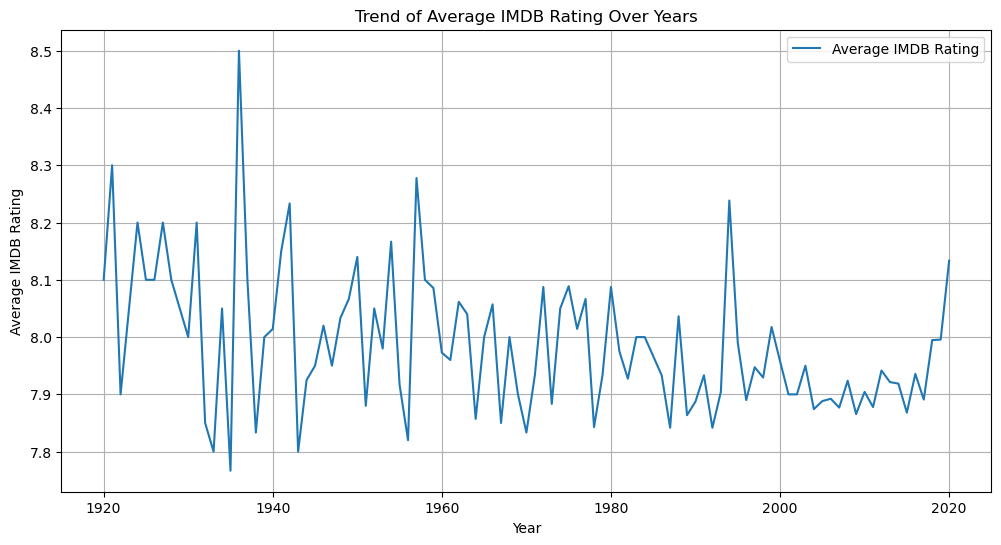

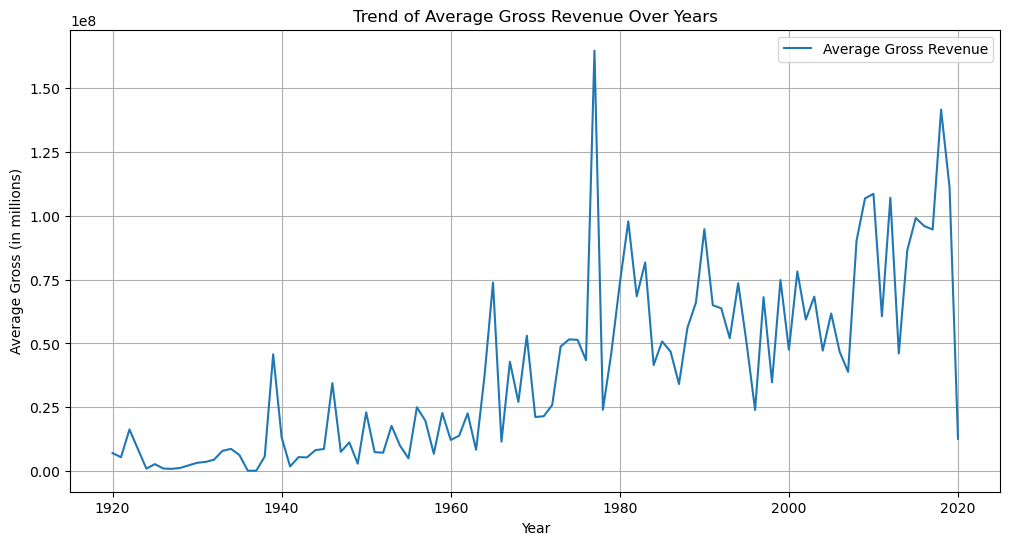

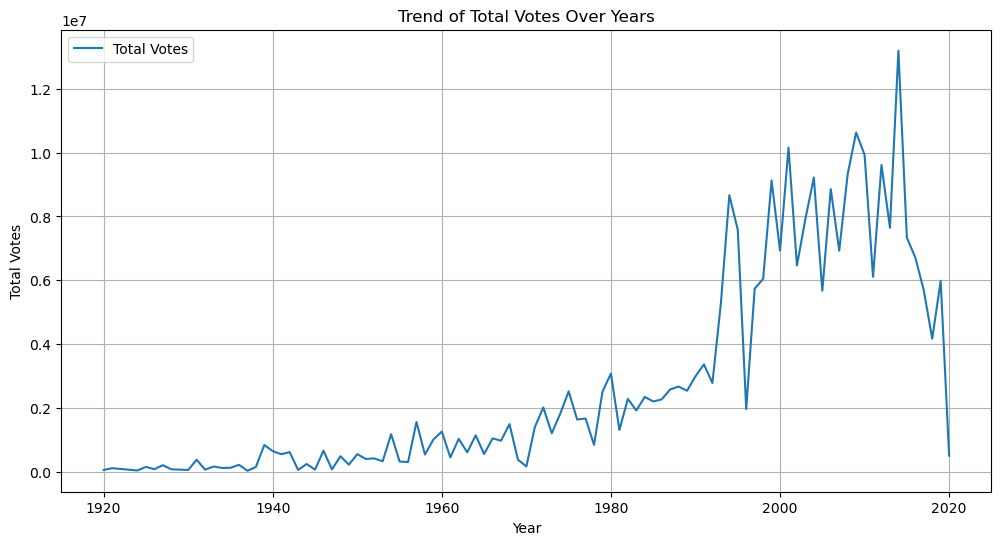

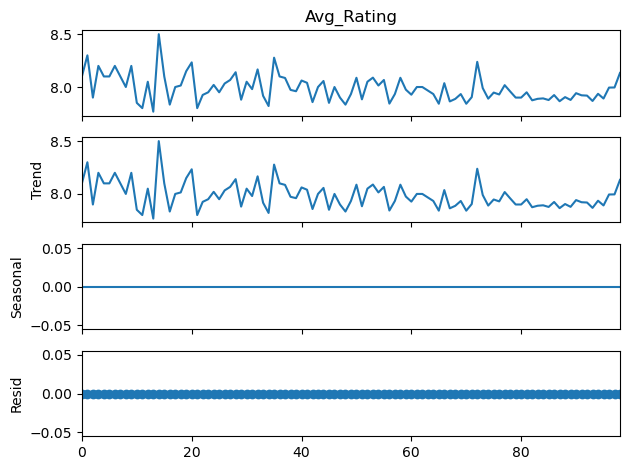

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Preprocessing
# Ensure Released_Year is treated as a time index
data['Released_Year'] = pd.to_datetime(data['Released_Year'], format='%Y')

# Aggregate data by year (e.g., average IMDB_Rating and Gross)
yearly_data = data.groupby(data['Released_Year'].dt.year).agg({
    'IMDB_Rating': 'mean',
    'Gross': 'mean',
    'No_of_Votes': 'sum'
}).reset_index()

# Rename columns for clarity
yearly_data.columns = ['Year', 'Avg_Rating', 'Avg_Gross', 'Total_Votes']

# Step 2: Visualization
# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Year'], yearly_data['Avg_Rating'], label='Average IMDB Rating')
plt.title('Trend of Average IMDB Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Year'], yearly_data['Avg_Gross'], label='Average Gross Revenue')
plt.title('Trend of Average Gross Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Average Gross (in millions)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Year'], yearly_data['Total_Votes'], label='Total Votes')
plt.title('Trend of Total Votes Over Years')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.legend()
plt.grid()
plt.show()

# Step 3: Trend Decomposition
# Decompose the IMDB Rating trend
decompose_result = seasonal_decompose(yearly_data['Avg_Rating'], model='additive', period=1)

# Plot decomposed components
decompose_result.plot()
plt.show()

# Step 4: Optional - Forecasting
# Use forecasting models like ARIMA or SARIMA (future extension)


IMDB Ratings Forecast Evaluation:
Mean Squared Error: 0.01
Gross Revenue Forecast Evaluation:
Mean Squared Error: 1481493643930480.25


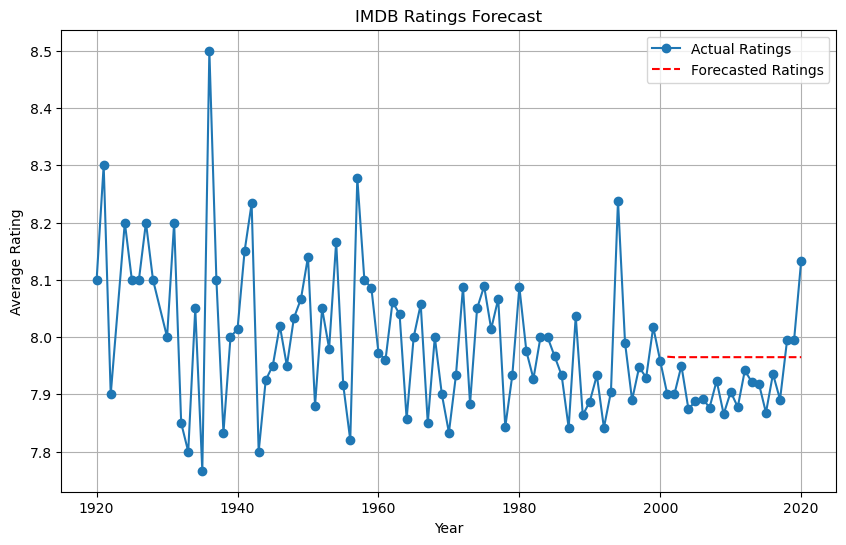

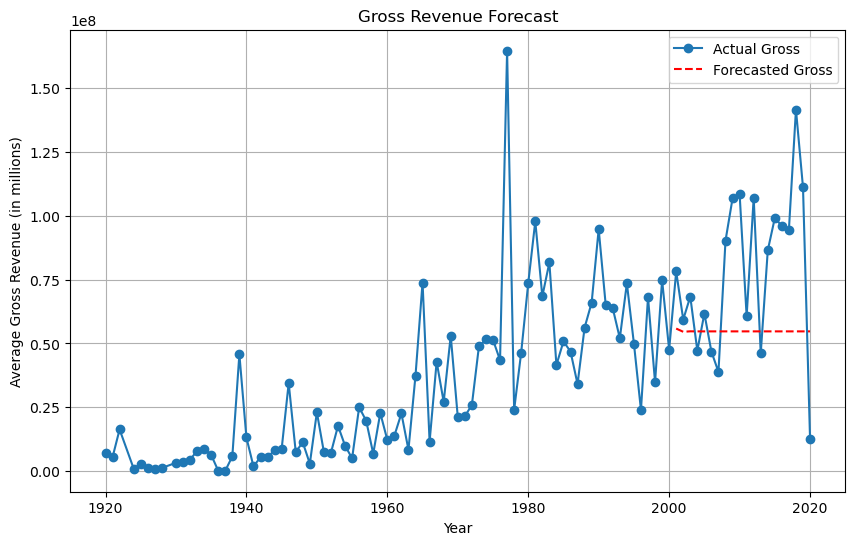

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Preprocessing
data['Released_Year'] = pd.to_datetime(data['Released_Year'], format='%Y')

# Aggregate by year
yearly_data = data.groupby(data['Released_Year'].dt.year).agg({
    'IMDB_Rating': 'mean',
    'Gross': 'mean'
}).reset_index()

yearly_data.columns = ['Year', 'Avg_Rating', 'Avg_Gross']

# Split into training and test sets
train_size = int(len(yearly_data) * 0.8)
train, test = yearly_data[:train_size], yearly_data[train_size:]

# Forecasting for IMDB Ratings
def forecast_arima(series, order=(1, 1, 1)):
    # Fit ARIMA model
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    
    # Forecast
    forecast = model_fit.forecast(steps=len(test))
    
    return forecast, model_fit

# Forecast IMDB Ratings
rating_forecast, rating_model_fit = forecast_arima(train['Avg_Rating'], order=(1, 1, 1))

# Forecasting for Gross Revenue
gross_forecast, gross_model_fit = forecast_arima(train['Avg_Gross'], order=(1, 1, 1))

# Evaluate the model
def evaluate_forecast(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    print(f"Mean Squared Error: {mse:.2f}")
    return mse

# Evaluate the ratings forecast
print("IMDB Ratings Forecast Evaluation:")
evaluate_forecast(test['Avg_Rating'], rating_forecast)

# Evaluate the gross forecast
print("Gross Revenue Forecast Evaluation:")
evaluate_forecast(test['Avg_Gross'], gross_forecast)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['Year'], yearly_data['Avg_Rating'], label='Actual Ratings', marker='o')
plt.plot(test['Year'], rating_forecast, label='Forecasted Ratings', linestyle='--', color='red')
plt.title('IMDB Ratings Forecast')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(yearly_data['Year'], yearly_data['Avg_Gross'], label='Actual Gross', marker='o')
plt.plot(test['Year'], gross_forecast, label='Forecasted Gross', linestyle='--', color='red')
plt.title('Gross Revenue Forecast')
plt.xlabel('Year')
plt.ylabel('Average Gross Revenue (in millions)')
plt.legend()
plt.grid()
plt.show()


Correlation Matrix:
               Released_Year  IMDB_Rating     Gross  No_of_Votes
Released_Year       1.000000    -0.131152  0.239746     0.241779
IMDB_Rating        -0.131152     1.000000  0.090268     0.494979
Gross               0.239746     0.090268  1.000000     0.596409
No_of_Votes         0.241779     0.494979  0.596409     1.000000


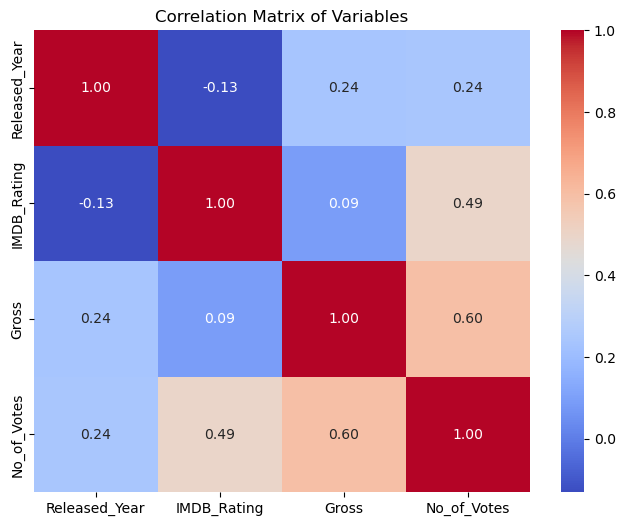

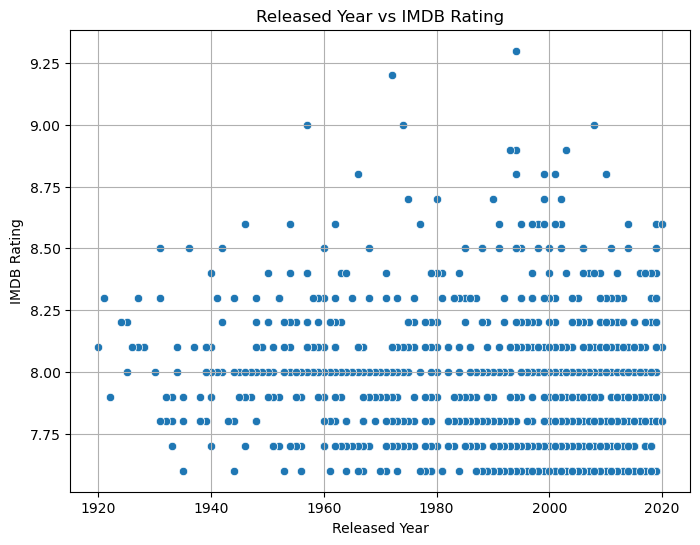

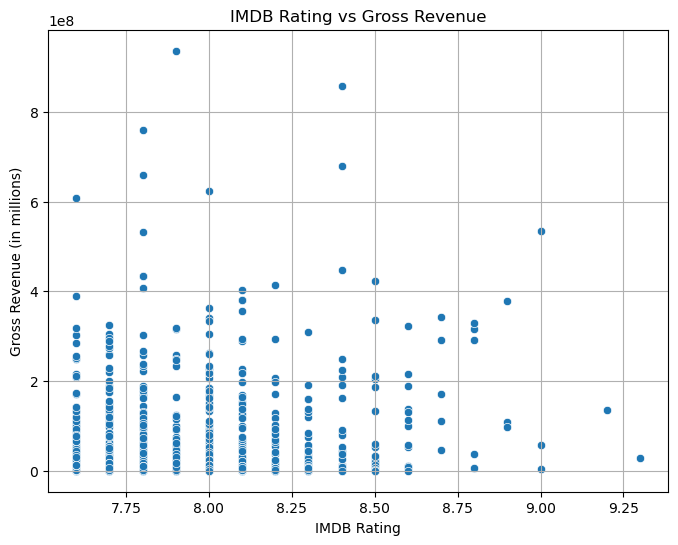

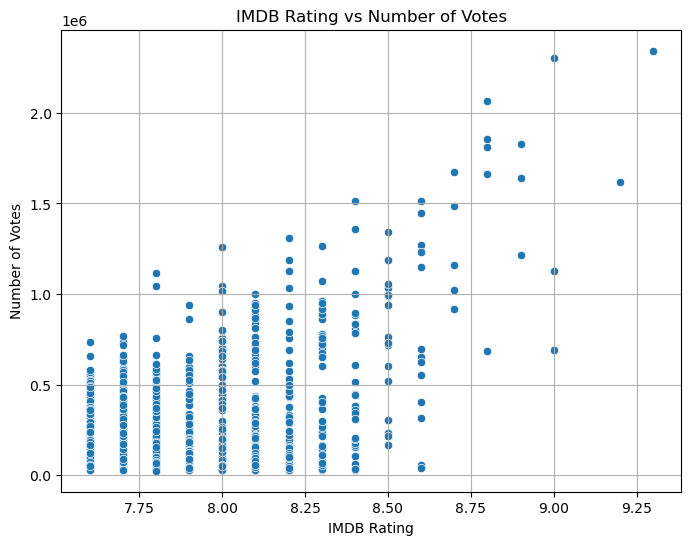

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Preprocessing
# Remove rows with missing values in critical columns
data_cleaned = data[['Released_Year', 'IMDB_Rating', 'Gross', 'No_of_Votes']].dropna()

# Ensure Released_Year is numeric for analysis
data_cleaned['Released_Year'] = pd.to_numeric(data_cleaned['Released_Year'])

# Step 2: Correlation Coefficients
# Calculate the correlation matrix
correlation_matrix = data_cleaned.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Step 3: Visualization
# Heatmap for Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

# Scatter Plot: Released Year vs IMDB Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Released_Year', y='IMDB_Rating', data=data_cleaned)
plt.title('Released Year vs IMDB Rating')
plt.xlabel('Released Year')
plt.ylabel('IMDB Rating')
plt.grid()
plt.show()

# Scatter Plot: IMDB Rating vs Gross Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=data_cleaned)
plt.title('IMDB Rating vs Gross Revenue')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross Revenue (in millions)')
plt.grid()
plt.show()

# Scatter Plot: IMDB Rating vs No. of Votes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='IMDB_Rating', y='No_of_Votes', data=data_cleaned)
plt.title('IMDB Rating vs Number of Votes')
plt.xlabel('IMDB Rating')
plt.ylabel('Number of Votes')
plt.grid()
plt.show()


## Movie recommendation based on some words from the overview (cosine similarity)

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Preprocessing
# Fill missing overviews with an empty string
data['Overview'] = data['Overview'].fillna('')

# Step 2: TF-IDF Vectorization
# Convert the overviews into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Overview'])

# Step 3: Define the Recommendation Function
def recommend_movies_based_on_query(query, tfidf_vectorizer=tfidf_vectorizer, tfidf_matrix=tfidf_matrix, data=data):
    # Transform the query into a vector
    query_vector = tfidf_vectorizer.transform([query])
    
    # Compute cosine similarity between the query and all overviews
    similarity_scores = cosine_similarity(query_vector, tfidf_matrix)
    
    # Get the top 5 most similar movies
    top_indices = similarity_scores[0].argsort()[-5:][::-1]
    
    # Retrieve movie titles and overviews
    recommendations = data.iloc[top_indices][['Series_Title', 'Overview']]
    
    return recommendations

# Step 4: Take User Query
query = input("Enter 3-4 words describing a movie (e.g., 'hero saves world'): ")

# Step 5: Get Recommendations
recommended_movies = recommend_movies_based_on_query(query)

# Step 6: Display Recommendations
if recommended_movies.empty:
    print("No movies match your query. Try using different words.")
else:
    print("\nMovies that match your query:")
    for i, row in recommended_movies.iterrows():
        print(f"\nTitle: {row['Series_Title']}")
        print(f"Overview: {row['Overview']}")


Enter 3-4 words describing a movie (e.g., 'hero saves world'):  Love Hate crime



Movies that match your query:

Title: Underground
Overview: A group of Serbian socialists prepares for the war in a surreal underground filled by parties, tragedies, love and hate.

Title: Office Space
Overview: Three company workers who hate their jobs decide to rebel against their greedy boss.

Title: Do the Right Thing
Overview: On the hottest day of the year on a street in the Bedford-Stuyvesant section of Brooklyn, everyone's hate and bigotry smolders and builds until it explodes into violence.

Title: Les quatre cents coups
Overview: A young boy, left without attention, delves into a life of petty crime.

Title: Bonnie and Clyde
Overview: Bored waitress Bonnie Parker falls in love with an ex-con named Clyde Barrow and together they start a violent crime spree through the country, stealing cars and robbing banks.


In [12]:
!pip install rank-bm25


## Movie recommendation based on some words from the overview (BM25)

In [14]:
import pandas as pd
from rank_bm25 import BM25Okapi

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Preprocessing
# Fill missing overviews with an empty string
data['Overview'] = data['Overview'].fillna('')

# Tokenize the overviews
tokenized_overviews = [overview.split() for overview in data['Overview']]

# Step 2: Initialize BM25
bm25 = BM25Okapi(tokenized_overviews)

# Step 3: Define the Recommendation Function
def recommend_movies_bm25(query, bm25=bm25, data=data, top_n=5):
    # Tokenize the query
    query_tokens = query.split()
    
    # Get BM25 scores for the query
    scores = bm25.get_scores(query_tokens)
    
    # Get the top-n indices with the highest scores
    top_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:top_n]
    
    # Retrieve movie titles and overviews
    recommendations = data.iloc[top_indices][['Series_Title', 'Overview']]
    
    return recommendations

# Step 4: Take User Query
query = input("Enter 3-4 words describing a movie (e.g., 'hero saves world'): ")

# Step 5: Get Recommendations
recommended_movies = recommend_movies_bm25(query)

# Step 6: Display Recommendations
if recommended_movies.empty:
    print("No movies match your query. Try using different words.")
else:
    print("\nMovies that match your query:")
    for i, row in recommended_movies.iterrows():
        print(f"\nTitle: {row['Series_Title']}")
        print(f"Overview: {row['Overview']}")


Enter 3-4 words describing a movie (e.g., 'hero saves world'):  hero saves world



Movies that match your query:

Title: Wreck-It Ralph
Overview: A video game villain wants to be a hero and sets out to fulfill his dream, but his quest brings havoc to the whole arcade where he lives.

Title: Le Petit Prince
Overview: A little girl lives in a very grown-up world with her mother, who tries to prepare her for it. Her neighbor, the Aviator, introduces the girl to an extraordinary world where anything is possible, the world of the Little Prince.

Title: Das Boot
Overview: The claustrophobic world of a WWII German U-boat; boredom, filth and sheer terror.

Title: The Perks of Being a Wallflower
Overview: An introvert freshman is taken under the wings of two seniors who welcome him to the real world

Title: Coraline
Overview: An adventurous 11-year-old girl finds another world that is a strangely idealized version of her frustrating home, but it has sinister secrets.


Gross Revenue Prediction - Mean Squared Error: 11300904128320466.00
IMDB Rating Prediction - Mean Squared Error: 0.06


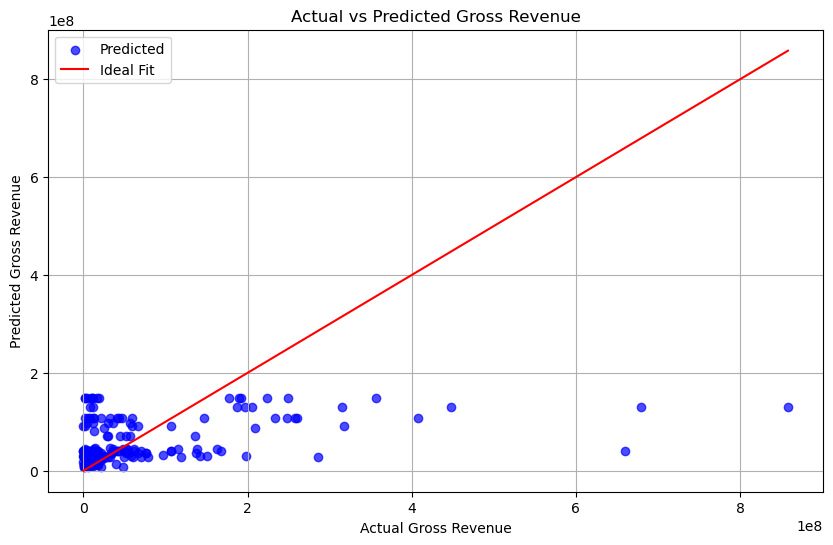

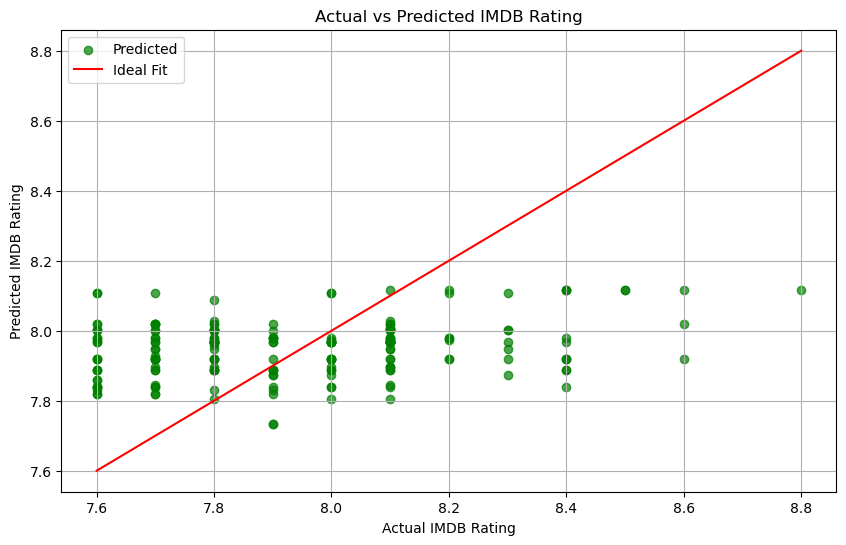

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Step 1: Data Preprocessing
# Select relevant columns
data = data[['Genre_1', 'Certificate', 'Gross', 'IMDB_Rating']]

# Handle missing values
data = data.dropna()

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(data[['Genre_1', 'Certificate']])

# Create a DataFrame for encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Genre_1', 'Certificate']))

# Combine encoded features with the target variables
data = pd.concat([encoded_df, data[['Gross', 'IMDB_Rating']].reset_index(drop=True)], axis=1)

# Step 2: Train-Test Split
X = data.drop(columns=['Gross', 'IMDB_Rating'])
y_gross = data['Gross']
y_rating = data['IMDB_Rating']

X_train, X_test, y_gross_train, y_gross_test, y_rating_train, y_rating_test = train_test_split(
    X, y_gross, y_rating, test_size=0.2, random_state=42
)

# Step 3: Model Training and Prediction
# Train models for Gross and IMDB Rating
gross_model = RandomForestRegressor(random_state=42)
rating_model = RandomForestRegressor(random_state=42)

gross_model.fit(X_train, y_gross_train)
rating_model.fit(X_train, y_rating_train)

# Step 4: Model Evaluation
# Predict Gross Revenue
gross_pred = gross_model.predict(X_test)
gross_mse = mean_squared_error(y_gross_test, gross_pred)
print(f"Gross Revenue Prediction - Mean Squared Error: {gross_mse:.2f}")

# Predict IMDB Rating
rating_pred = rating_model.predict(X_test)
rating_mse = mean_squared_error(y_rating_test, rating_pred)
print(f"IMDB Rating Prediction - Mean Squared Error: {rating_mse:.2f}")

# Step 5: Visualization of Actual vs Predicted Values
# Plot Actual vs Predicted for Gross Revenue
plt.figure(figsize=(10, 6))
plt.scatter(y_gross_test, gross_pred, alpha=0.7, label="Predicted", color='blue')
plt.plot([y_gross_test.min(), y_gross_test.max()], [y_gross_test.min(), y_gross_test.max()], color='red', label="Ideal Fit")
plt.title('Actual vs Predicted Gross Revenue')
plt.xlabel('Actual Gross Revenue')
plt.ylabel('Predicted Gross Revenue')
plt.legend()
plt.grid()
plt.show()

# Plot Actual vs Predicted for IMDB Rating
plt.figure(figsize=(10, 6))
plt.scatter(y_rating_test, rating_pred, alpha=0.7, label="Predicted", color='green')
plt.plot([y_rating_test.min(), y_rating_test.max()], [y_rating_test.min(), y_rating_test.max()], color='red', label="Ideal Fit")
plt.title('Actual vs Predicted IMDB Rating')
plt.xlabel('Actual IMDB Rating')
plt.ylabel('Predicted IMDB Rating')
plt.legend()
plt.grid()
plt.show()


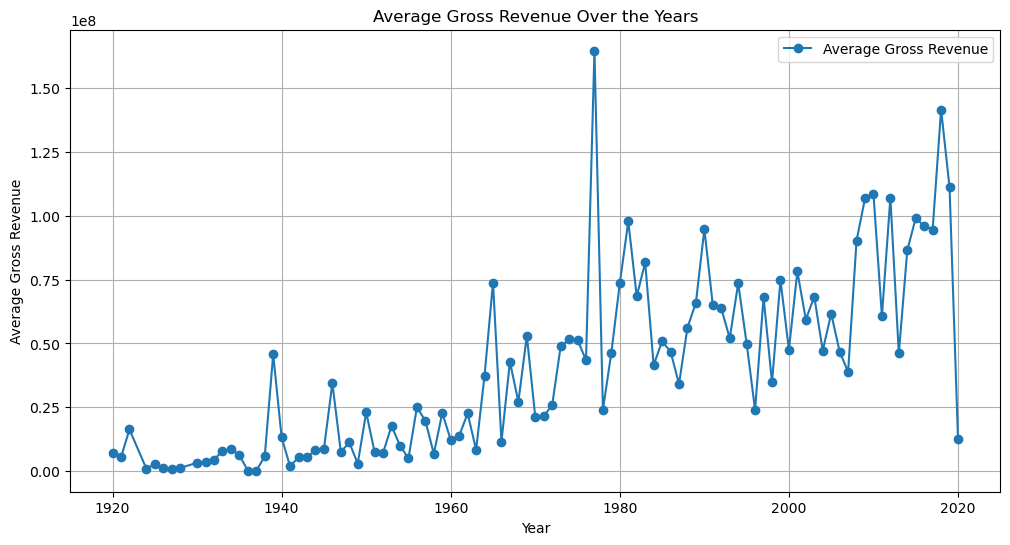

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure Released_Year and Gross columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross'])

# Group by Released Year and calculate average gross revenue
gross_by_year = data_cleaned.groupby('Released_Year')['Gross'].mean().reset_index()

# Plotting the gross revenue over the years
plt.figure(figsize=(12, 6))
plt.plot(gross_by_year['Released_Year'], gross_by_year['Gross'], marker='o', linestyle='-', label='Average Gross Revenue')
plt.title('Average Gross Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Gross Revenue')
plt.grid()
plt.legend()
plt.show()


Mean Squared Error: 2249558276997356.50


C:\Users\baradara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\baradara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\baradara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\baradara\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the d

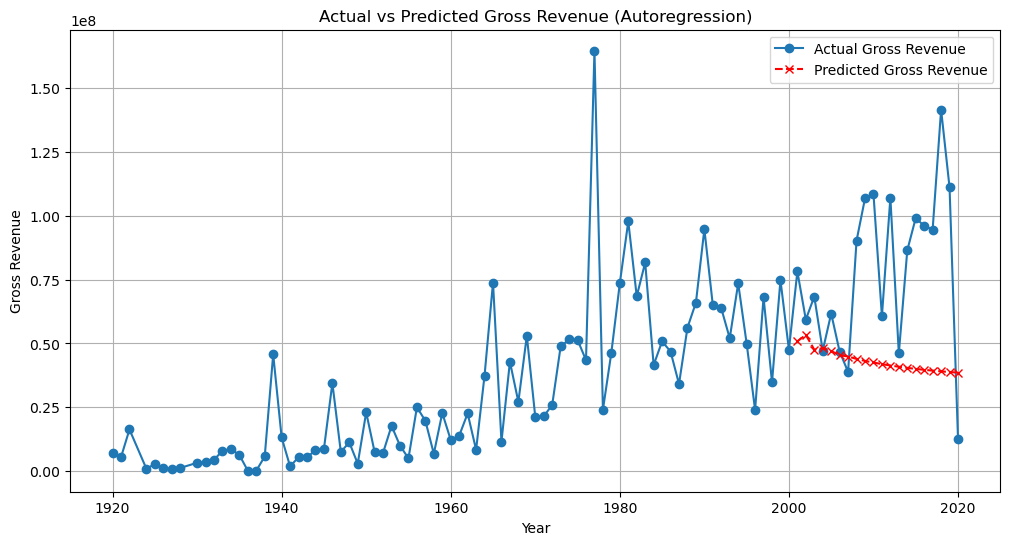

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure Released_Year and Gross columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross'])

# Group by Released Year and calculate average gross revenue
gross_by_year = data_cleaned.groupby('Released_Year')['Gross'].mean().reset_index()

# Step 1: Prepare Time Series Data
gross_by_year = gross_by_year.sort_values(by='Released_Year')
gross_by_year.set_index('Released_Year', inplace=True)
time_series = gross_by_year['Gross']

# Step 2: Train-Test Split
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Step 3: Fit the Autoregression Model
model = AutoReg(train, lags=3)  # Use 3 years of lag
model_fit = model.fit()

# Step 4: Make Predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Step 5: Evaluate the Model
mse = mean_squared_error(test, predictions)
print(f"Mean Squared Error: {mse:.2f}")

# Step 6: Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual Gross Revenue', marker='o')
plt.plot(test.index, predictions, label='Predicted Gross Revenue', marker='x', linestyle='--', color='red')
plt.title('Actual vs Predicted Gross Revenue (Autoregression)')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.legend()
plt.grid()
plt.show()


C:\Users\baradara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\baradara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\baradara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\baradara\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the d

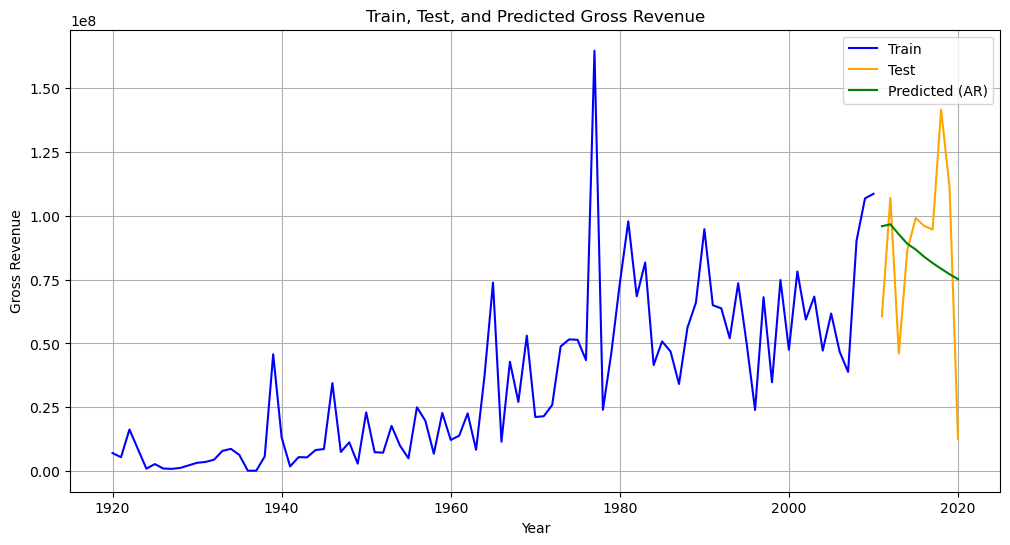

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure Released_Year and Gross columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross'])

# Group by Released Year and calculate average gross revenue
gross_by_year = data_cleaned.groupby('Released_Year')['Gross'].mean().reset_index()

# Step 1: Prepare Time Series Data
gross_by_year = gross_by_year.sort_values(by='Released_Year')
gross_by_year.set_index('Released_Year', inplace=True)
time_series = gross_by_year['Gross']

# Step 2: Train-Test Split
train_size = int(len(time_series) * 0.9)
train, test = time_series[:train_size], time_series[train_size:]

# Step 3: Fit the Autoregression Model
model = AutoReg(train, lags=3)  # Use 3 years of lag
model_fit = model.fit()

# Step 4: Make Predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Step 5: Plot Training, Test, and Predicted Data
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train.index, train, label="Train", color='blue')

# Plot test data
plt.plot(test.index, test, label="Test", color='orange')

# Plot predicted data
plt.plot(test.index, predictions, label="Predicted (AR)", color='green')

# Add titles and labels
plt.title('Train, Test, and Predicted Gross Revenue')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.legend()
plt.grid()
plt.show()


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate accuracy metrics
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, predictions)
r2 = r2_score(test, predictions)

# Display accuracy metrics
print("Model Accuracy Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model Accuracy Metrics:
Mean Squared Error (MSE): 1295638048125233.25
Root Mean Squared Error (RMSE): 35994972.54
Mean Absolute Error (MAE): 29130779.19
R-squared (R2): -0.07


<Figure size 1000x600 with 0 Axes>

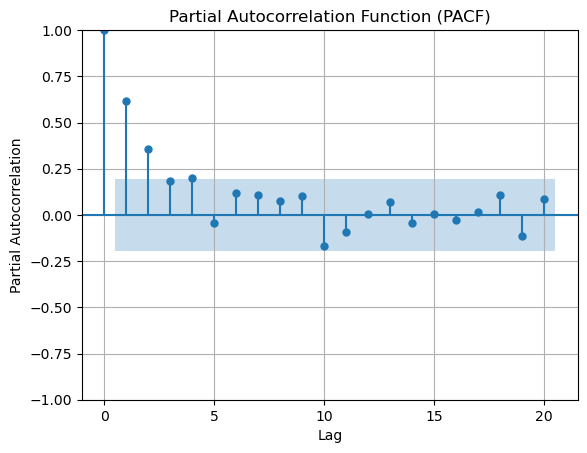

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Load the dataset
file_path = 'imdb_1000_final_with_correct_certificate.csv'
data = pd.read_csv(file_path)

# Ensure Released_Year and Gross columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross'])

# Group by Released Year and calculate average gross revenue
gross_by_year = data_cleaned.groupby('Released_Year')['Gross'].mean().reset_index()

# Prepare Time Series Data
gross_by_year = gross_by_year.sort_values(by='Released_Year')
gross_by_year.set_index('Released_Year', inplace=True)
time_series = gross_by_year['Gross']

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(10, 6))
plot_pacf(time_series, lags=20, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid()
plt.show()


<Figure size 1000x600 with 0 Axes>

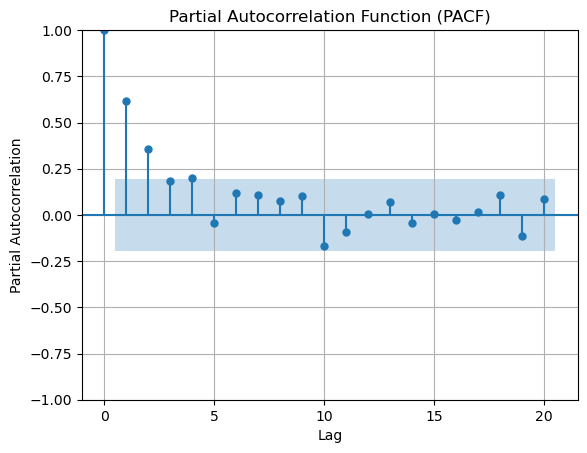

Mean Squared Error: 1768948633518520.50


C:\Users\baradara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\baradara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\baradara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\baradara\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the d

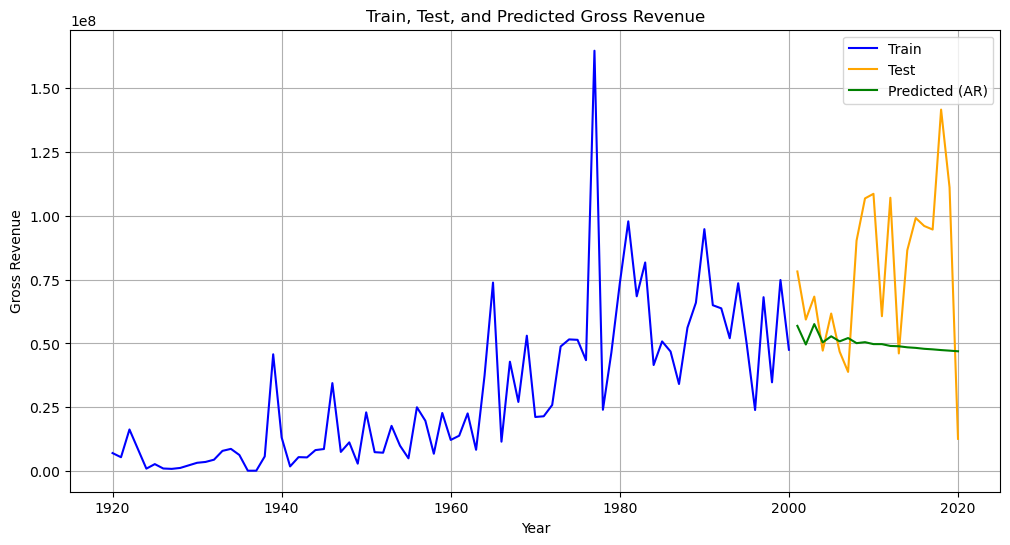

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Ensure Released_Year and Gross columns are properly formatted
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Drop rows with missing or invalid data in the relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross'])

# Group by Released Year and calculate average gross revenue
gross_by_year = data_cleaned.groupby('Released_Year')['Gross'].mean().reset_index()

# Step 1: Prepare Time Series Data
gross_by_year = gross_by_year.sort_values(by='Released_Year')
gross_by_year.set_index('Released_Year', inplace=True)
time_series = gross_by_year['Gross']

# Step 2: PACF Analysis to Identify the Optimal Lag
plt.figure(figsize=(10, 6))
plot_pacf(time_series, lags=20, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid()
plt.show()

# Based on the PACF plot, choose the optimal lag (for example, choose 4 based on the PACF)
optimal_lag = 4  # Update this based on PACF plot

# Step 3: Train-Test Split
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Step 4: Fit the Autoregression Model with the optimal lag
model = AutoReg(train, lags=optimal_lag)  # Use the optimal lag from PACF plot
model_fit = model.fit()

# Step 5: Make Predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Step 6: Evaluate the Model
mse = mean_squared_error(test, predictions)
print(f"Mean Squared Error: {mse:.2f}")

# Step 7: Plot Training, Test, and Predicted Data
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train.index, train, label="Train", color='blue')

# Plot test data
plt.plot(test.index, test, label="Test", color='orange')

# Plot predicted data
plt.plot(test.index, predictions, label="Predicted (AR)", color='green')

# Add titles and labels
plt.title('Train, Test, and Predicted Gross Revenue')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.legend()
plt.grid()
plt.show()


C:\Users\baradara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\baradara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error (MSE): 1195432659224441.75
Root Mean Squared Error (RMSE): 34575029.42


C:\Users\baradara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\baradara\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


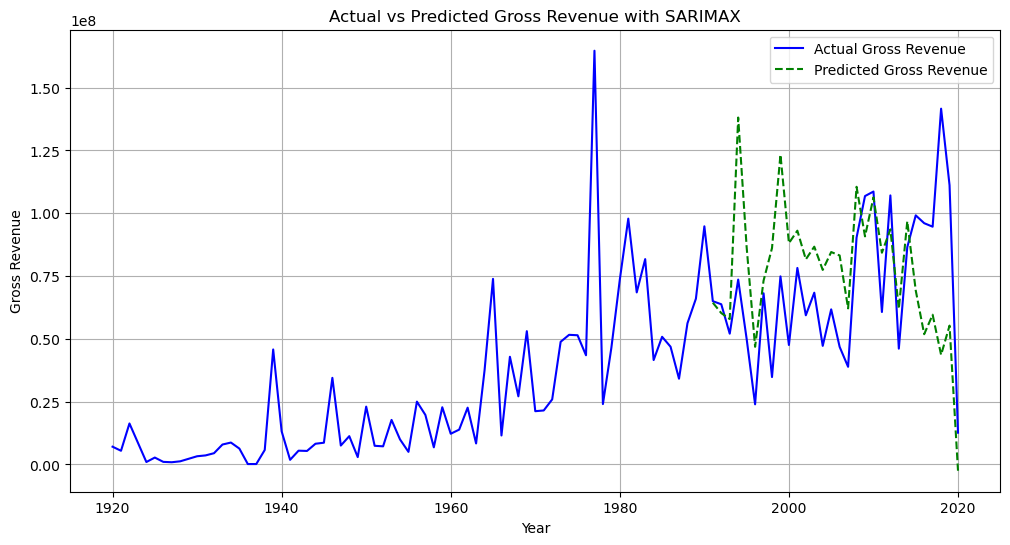

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
file_path = 'imdb_1000_final_with_correct_certificate.csv'
data = pd.read_csv(file_path)

# Step 1: Select Relevant Features
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')
data['IMDB_Rating'] = pd.to_numeric(data['IMDB_Rating'], errors='coerce')

# Drop rows with missing data in relevant columns
data_cleaned = data.dropna(subset=['Released_Year', 'Gross', 'IMDB_Rating', 'Genre_1', 'Certificate'])

# One-hot encode categorical variables (Genre_1 and Certificate)
data_encoded = pd.get_dummies(data_cleaned, columns=['Genre_1', 'Certificate'], drop_first=True)

# Step 2: Filter Numeric Columns for Aggregation
numeric_columns = data_encoded.select_dtypes(include=['number']).columns
grouped = data_encoded.groupby('Released_Year')[numeric_columns].mean()

# Step 3: Prepare Data for SARIMAX
target = grouped['Gross']
exog = grouped.drop(columns=['Gross'])  # Exogenous variables (IMDB_Rating, encoded Genre_1, Certificate)

# Train-test split
train_size = int(len(target) * 0.7)
train_target, test_target = target[:train_size], target[train_size:]
train_exog, test_exog = exog[:train_size], exog[train_size:]

# Step 4: Fit SARIMAX Model
model = SARIMAX(train_target, exog=train_exog, order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))
model_fit = model.fit(disp=False)

# Step 5: Make Predictions
predictions = model_fit.predict(start=len(train_target), end=len(target) - 1, exog=test_exog)

# Step 6: Evaluate the Model
mse = mean_squared_error(test_target, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Step 7: Plot Results
plt.figure(figsize=(12, 6))
plt.plot(target.index, target, label='Actual Gross Revenue', color='blue')
plt.plot(test_target.index, predictions, label='Predicted Gross Revenue', color='green', linestyle='--')
plt.title('Actual vs Predicted Gross Revenue with SARIMAX')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.legend()
plt.grid()
plt.show()


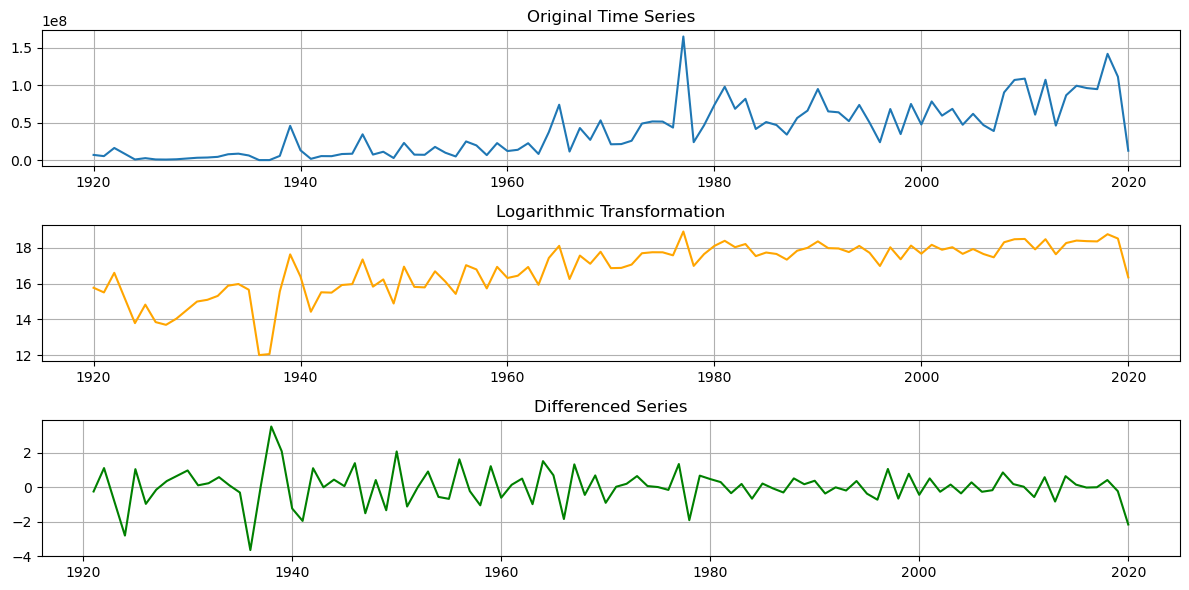

Results of Dickey-Fuller Test for Original Series:
ADF Statistic: -0.2654689905750755
p-value: 0.9302545708206589
Critical Values: {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}
The series is not stationary.
Results of Dickey-Fuller Test for Logarithmic Series:
ADF Statistic: -2.482908832866375
p-value: 0.11968836285995077
Critical Values: {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}
The series is not stationary.
Results of Dickey-Fuller Test for Differenced Series:
ADF Statistic: -7.735111747348287
p-value: 1.0989450596854074e-11
Critical Values: {'1%': -3.50434289821397, '5%': -2.8938659630479413, '10%': -2.5840147047458037}
The series is stationary.


In [23]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'imdb_1000_final_with_correct_certificate.csv'
data = pd.read_csv(file_path)

# Preprocess the data (as before)
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')
data_cleaned = data.dropna(subset=['Released_Year', 'Gross'])

# Group by Released Year and calculate average gross revenue
gross_by_year = data_cleaned.groupby('Released_Year')['Gross'].mean().reset_index()
gross_by_year = gross_by_year.sort_values(by='Released_Year')
gross_by_year.set_index('Released_Year', inplace=True)
time_series = gross_by_year['Gross']

# Step 1: Logarithmic Transformation
log_series = np.log(time_series + 1)  # Add 1 to avoid log(0)

# Step 2: Differencing Transformation
diff_series = log_series.diff().dropna()

# Step 3: Plot the Original, Logarithmic, and Differenced Series
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(time_series, label="Original Series")
plt.title("Original Time Series")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(log_series, label="Log Transformed Series", color='orange')
plt.title("Logarithmic Transformation")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(diff_series, label="Differenced Series", color='green')
plt.title("Differenced Series")
plt.grid()

plt.tight_layout()
plt.show()

# Step 4: Perform ADF Test
def adf_test(series, title=''):
    print(f"Results of Dickey-Fuller Test for {title}:")
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

# ADF Test for the Original, Logarithmic, and Differenced Series
adf_test(time_series, title="Original Series")
adf_test(log_series, title="Logarithmic Series")
adf_test(diff_series, title="Differenced Series")


## Gross Revenue Prediction

Mean Absolute Error (MAE): 40229679.890389994
Root Mean Squared Error (RMSE): 82823290.89946677
R² Score: 0.49039732549064896


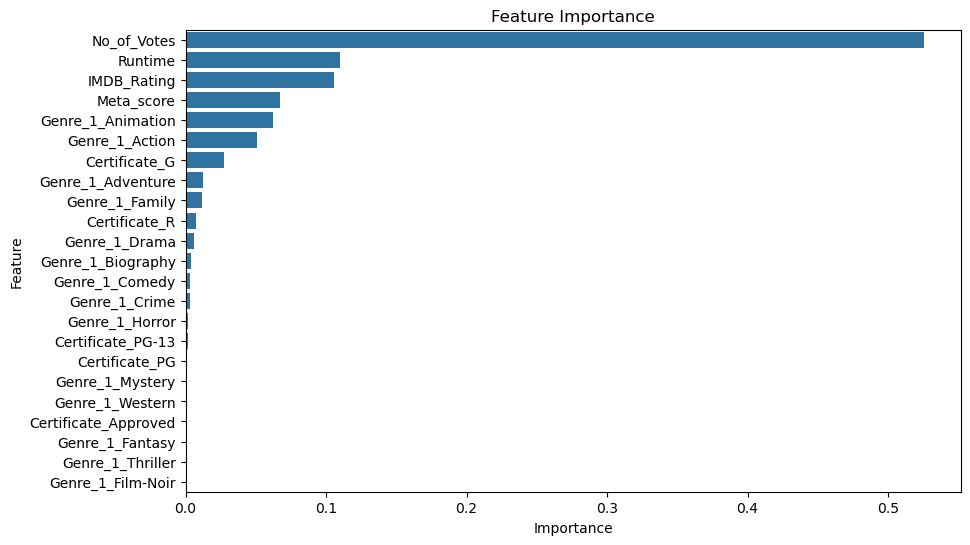

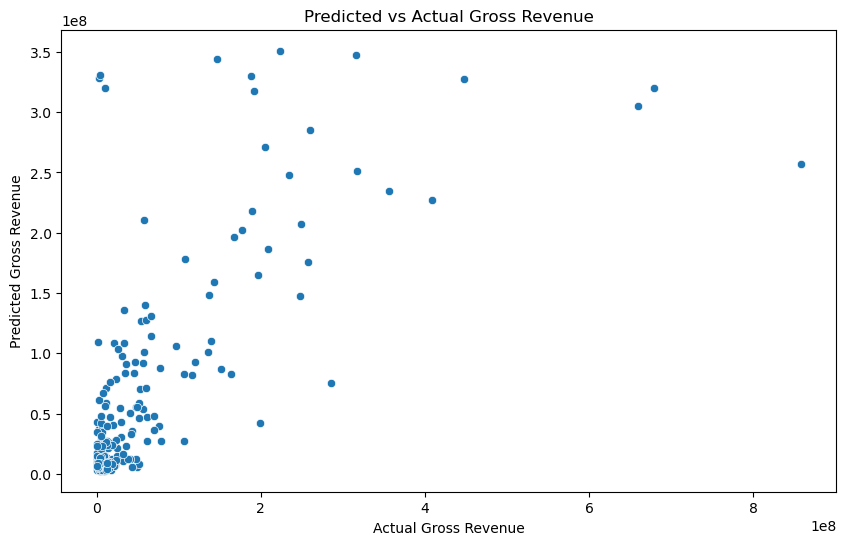

In [25]:


# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Data Cleaning and Feature Engineering
# Drop rows with missing gross revenue
data = data.dropna(subset=['Gross'])

# Select relevant features
X = data[['IMDB_Rating', 'Meta_score', 'Runtime', 'Certificate', 'No_of_Votes', 'Genre_1']]
y = data['Gross']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing Pipeline
numeric_features = ['IMDB_Rating', 'Meta_score', 'Runtime', 'No_of_Votes']
categorical_features = ['Certificate', 'Genre_1']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the Model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Feature Importance (Optional for RandomForest)
if isinstance(model.named_steps['regressor'], RandomForestRegressor):
    importances = model.named_steps['regressor'].feature_importances_
    feature_names = numeric_features + list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

# Visualization of Predictions vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Gross Revenue')
plt.ylabel('Predicted Gross Revenue')
plt.title('Predicted vs Actual Gross Revenue')
plt.show()


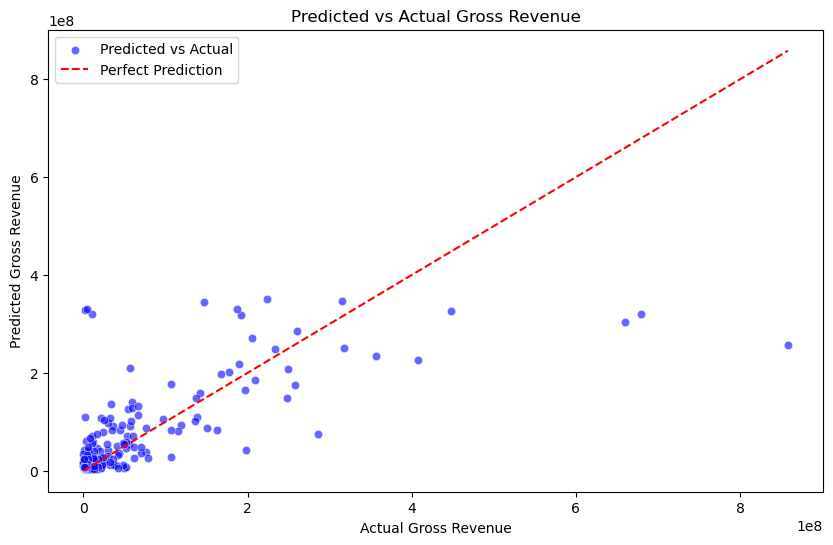

In [26]:
# Visualization of Predictions vs Actual
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot actual vs predicted
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')

# Add a diagonal reference line
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Gross Revenue')
plt.ylabel('Predicted Gross Revenue')
plt.title('Predicted vs Actual Gross Revenue')
plt.legend()
plt.show()


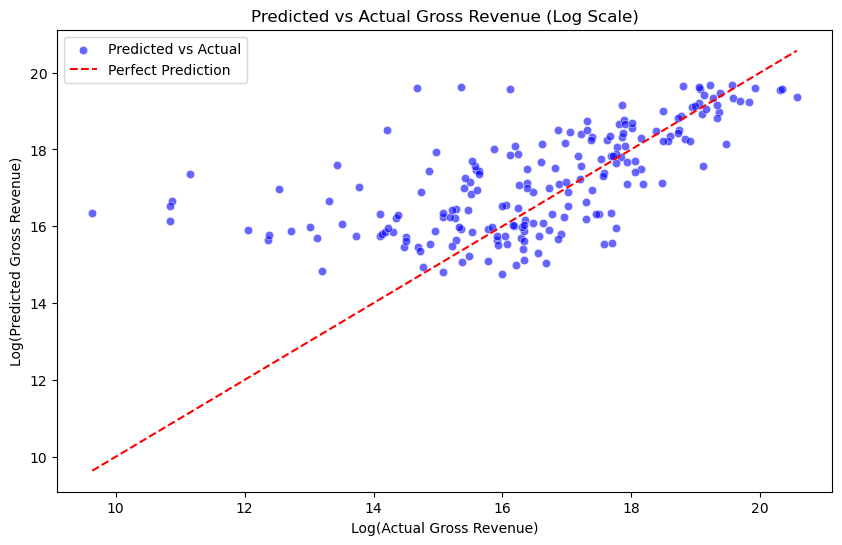

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Add a small value to avoid issues with log(0)
y_test_log = np.log1p(y_test)  # log1p(x) computes log(1 + x)
y_pred_log = np.log1p(y_pred)

plt.figure(figsize=(10, 6))

# Plot actual vs predicted in log domain
sns.scatterplot(x=y_test_log, y=y_pred_log, alpha=0.6, color='blue', label='Predicted vs Actual')

# Add a diagonal reference line
max_value = max(max(y_test_log), max(y_pred_log))
min_value = min(min(y_test_log), min(y_pred_log))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Log(Actual Gross Revenue)')
plt.ylabel('Log(Predicted Gross Revenue)')
plt.title('Predicted vs Actual Gross Revenue (Log Scale)')
plt.legend()
plt.show()


##  Recommend Movies Based on Similarity

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Select relevant features
features = data[['IMDB_Rating', 'Runtime', 'Certificate', 'Genre_1']]

# Preprocessing
# Scale numerical features
scaler = StandardScaler()
numeric_features = scaler.fit_transform(features[['IMDB_Rating', 'Runtime']])

# One-hot encode categorical features
encoder = OneHotEncoder()
categorical_features = encoder.fit_transform(features[['Certificate', 'Genre_1']]).toarray()

# Combine all features into a single matrix
feature_matrix = np.hstack((numeric_features, categorical_features))


# Perform SVD
svd = TruncatedSVD(n_components=10, random_state=42)  # Adjusted to 10 components
reduced_features = svd.fit_transform(feature_matrix)

# Define a function to get recommendations
def recommend_movies(movie_title, num_recommendations=5):
    # Find the index of the target movie
    target_index = data[data['Series_Title'] == movie_title].index[0]
    
    # Compute cosine similarity with all movies
    similarities = cosine_similarity(reduced_features[target_index].reshape(1, -1), reduced_features).flatten()
    
    # Get indices of the top similar movies (excluding the target movie itself)
    similar_indices = similarities.argsort()[::-1][1:num_recommendations+1]
    
    # Return the recommended movies
    recommended_movies = data.iloc[similar_indices][['Series_Title', 'IMDB_Rating', 'Genre_1', 'Certificate']]
    return recommended_movies

# Test the recommendation system
movie_to_recommend = "The Shawshank Redemption"
num_recs = 5
recommendations = recommend_movies(movie_to_recommend, num_recommendations=num_recs)

# Display recommendations
print(f"Movies similar to '{movie_to_recommend}':")
print(recommendations)


Movies similar to 'The Shawshank Redemption':
                       Series_Title  IMDB_Rating  Genre_1 Certificate
9                        Fight Club          8.8    Drama           R
11                     Forrest Gump          8.8    Drama           R
17  One Flew Over the Cuckoo's Nest          8.7    Drama           R
32            It's a Wonderful Life          8.6    Drama          PG
12  Il buono, il brutto, il cattivo          8.8  Western           R


## 6. Predict Movie Success (Hit/Flop)

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       100
           1       0.79      0.71      0.75       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200


Confusion Matrix:
[[81 19]
 [29 71]]

ROC-AUC Score:
0.8484499999999999


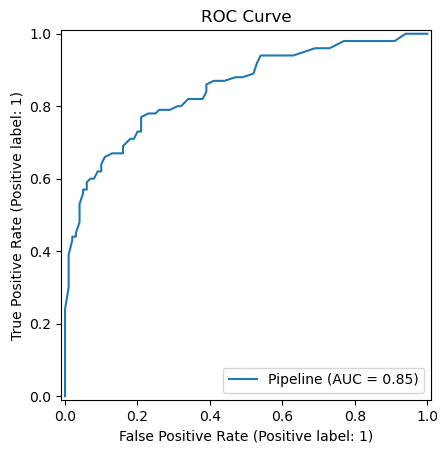

In [31]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Define success criteria (Hit or Flop based on Gross revenue threshold)
threshold = data['Gross'].median()  # Set threshold as median gross revenue
data['Success'] = np.where(data['Gross'] >= threshold, 1, 0)  # 1 for Hit, 0 for Flop

# Select features and target
X = data[['IMDB_Rating', 'Meta_score', 'Runtime', 'Certificate', 'No_of_Votes', 'Genre_1']]
y = data['Success']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing pipeline
numeric_features = ['IMDB_Rating', 'Meta_score', 'Runtime', 'No_of_Votes']
categorical_features = ['Certificate', 'Genre_1']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Build the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC Score:")
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(roc_auc)

# Plot ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
import matplotlib.pyplot as plt
plt.title("ROC Curve")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       100
           1       0.69      0.69      0.69       100

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200


Confusion Matrix:
[[69 31]
 [31 69]]

ROC-AUC Score:
0.7440000000000001


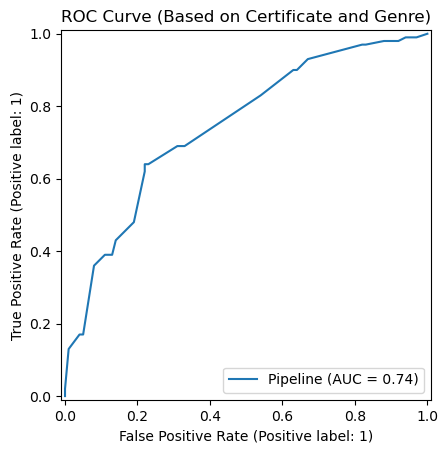

In [32]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Define success criteria (Hit or Flop based on Gross revenue threshold)
threshold = data['Gross'].median()  # Set threshold as median gross revenue
data['Success'] = np.where(data['Gross'] >= threshold, 1, 0)  # 1 for Hit, 0 for Flop

# Select only categorical features: Certificate and Genre_1
X = data[['Certificate', 'Genre_1']]
y = data['Success']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing pipeline for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, ['Certificate', 'Genre_1'])
    ]
)

# Build the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC Score:")
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(roc_auc)

# Plot ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve (Based on Certificate and Genre)")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       100
           1       0.79      0.76      0.78       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200


Confusion Matrix:
[[80 20]
 [24 76]]

ROC-AUC Score:
0.8561500000000001


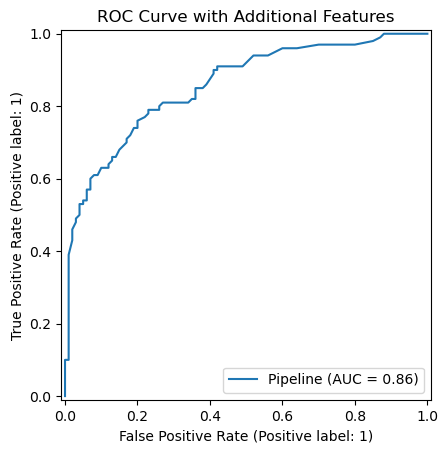

In [33]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Define success criteria (Hit or Flop based on Gross revenue threshold)
threshold = data['Gross'].median()  # Set threshold as median gross revenue
data['Success'] = np.where(data['Gross'] >= threshold, 1, 0)  # 1 for Hit, 0 for Flop

# Select additional features
X = data[['IMDB_Rating', 'Runtime', 'Meta_score', 'No_of_Votes', 'Certificate', 'Genre_1']]
y = data['Success']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing pipeline
numeric_features = ['IMDB_Rating', 'Runtime', 'Meta_score', 'No_of_Votes']
categorical_features = ['Certificate', 'Genre_1']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Build the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC Score:")
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(roc_auc)

# Plot ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve with Additional Features")
plt.show()


In [34]:
pip install textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB 1.3 MB/s eta 0:00:01
   --------------------- ------------------ 337.9/626.3 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 7.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Correlation between Sentiment Score and IMDb Rating:
                 Sentiment_Score  IMDB_Rating
Sentiment_Score         1.000000    -0.055268
IMDB_Rating            -0.055268     1.000000
Correlation between Sentiment Score and Success:
                 Sentiment_Score   Success
Sentiment_Score         1.000000  0.024634
Success                 0.024634  1.000000


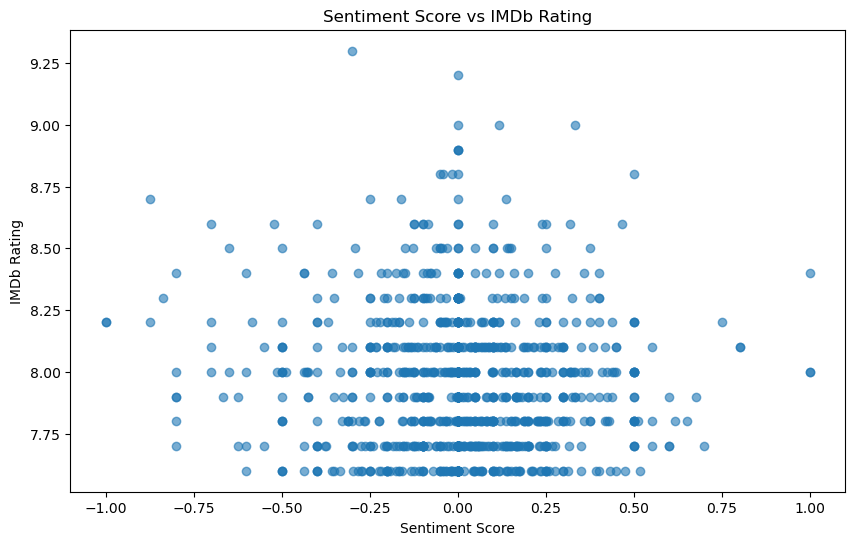

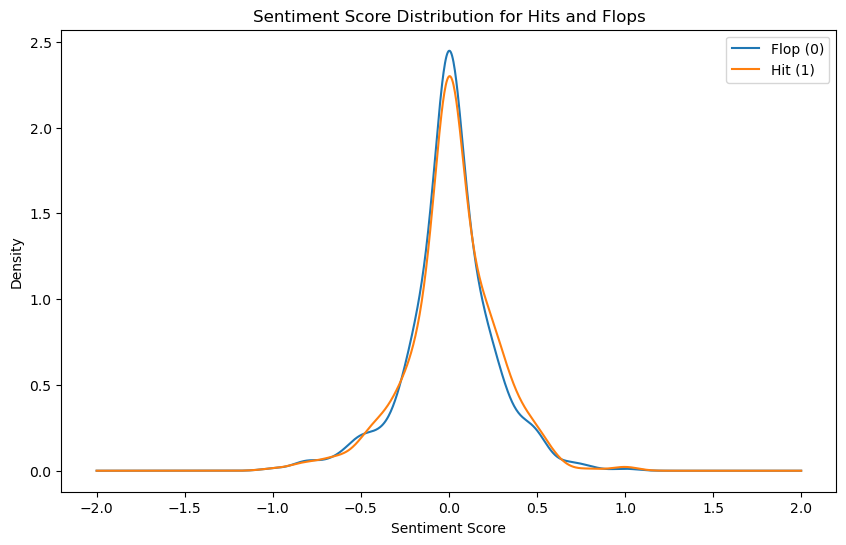


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.57      0.56       100
           1       0.55      0.52      0.53       100

    accuracy                           0.55       200
   macro avg       0.55      0.54      0.54       200
weighted avg       0.55      0.55      0.54       200


Confusion Matrix:
[[57 43]
 [48 52]]

ROC-AUC Score:
0.53975


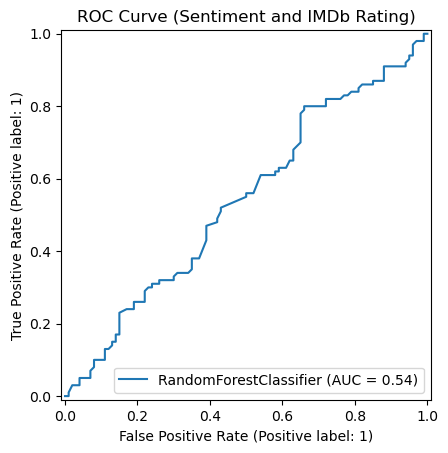

In [35]:
# Import required libraries
import pandas as pd
import numpy as np
from textblob import TextBlob  # For sentiment analysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Add a Sentiment Score Column using TextBlob
def get_sentiment(text):
    blob = TextBlob(str(text))  # Convert to string in case of NaN values
    return blob.sentiment.polarity  # Returns a score between -1 (negative) and 1 (positive)

data['Sentiment_Score'] = data['Overview'].apply(get_sentiment)

# Define success criteria (Hit or Flop based on Gross revenue threshold)
threshold = data['Gross'].median()  # Median gross revenue
data['Success'] = np.where(data['Gross'] >= threshold, 1, 0)  # 1 for Hit, 0 for Flop

# Correlate Sentiment with IMDb Rating and Success
print("Correlation between Sentiment Score and IMDb Rating:")
print(data[['Sentiment_Score', 'IMDB_Rating']].corr())

print("Correlation between Sentiment Score and Success:")
print(data[['Sentiment_Score', 'Success']].corr())

# Visualization of Sentiment Score vs IMDb Rating
plt.figure(figsize=(10, 6))
plt.scatter(data['Sentiment_Score'], data['IMDB_Rating'], alpha=0.6)
plt.title("Sentiment Score vs IMDb Rating")
plt.xlabel("Sentiment Score")
plt.ylabel("IMDb Rating")
plt.show()

# Visualization of Sentiment Score Distribution for Hits and Flops
plt.figure(figsize=(10, 6))
data.groupby('Success')['Sentiment_Score'].plot(kind='kde', legend=True)
plt.title("Sentiment Score Distribution for Hits and Flops")
plt.xlabel("Sentiment Score")
plt.legend(['Flop (0)', 'Hit (1)'])
plt.show()

# Model: Predict Success Using Sentiment Score and IMDb Rating
X = data[['Sentiment_Score', 'IMDB_Rating']]
y = data['Success']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nROC-AUC Score:")
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(roc_auc)

# Plot ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve (Sentiment and IMDb Rating)")
plt.show()


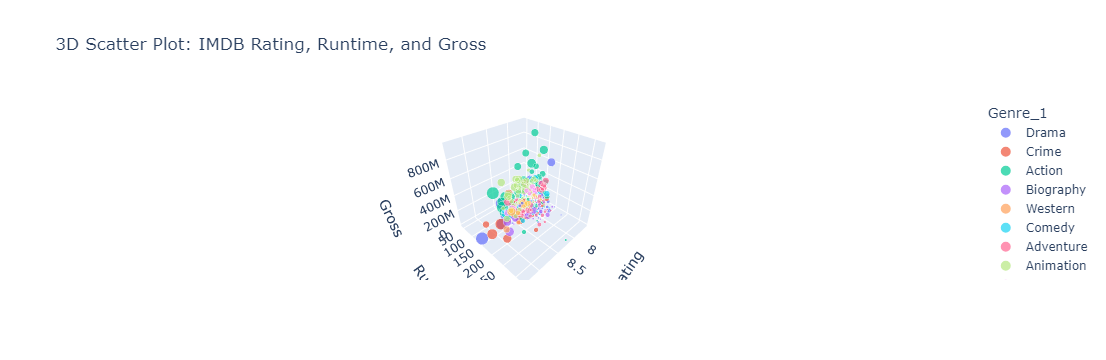

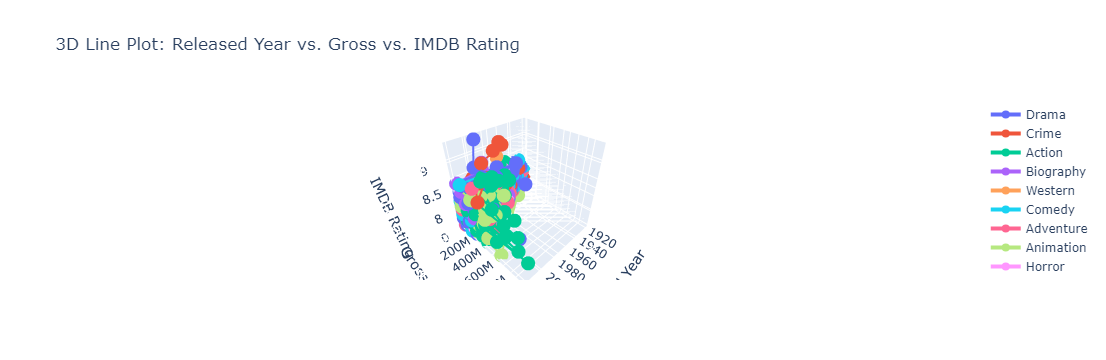

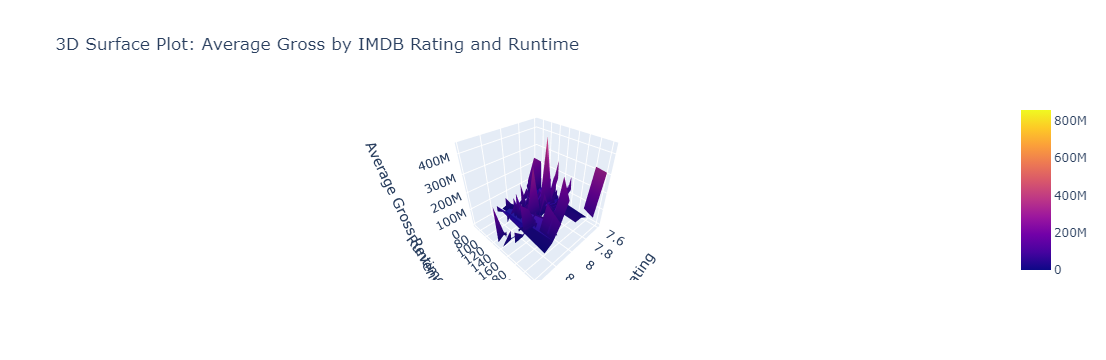

In [36]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Example 1: 3D Scatter Plot (IMDB Rating, Runtime, and Gross)
fig1 = px.scatter_3d(
    data,
    x='IMDB_Rating',
    y='Runtime',
    z='Gross',
    color='Genre_1',  # Color by Genre
    size='No_of_Votes',  # Size by Number of Votes
    hover_name='Series_Title',  # Show movie title on hover
    title="3D Scatter Plot: IMDB Rating, Runtime, and Gross"
)
fig1.show()

# Example 2: 3D Line Plot (Released Year vs. Gross)
fig2 = go.Figure()

# Add a line for each genre
for genre in data['Genre_1'].unique():
    genre_data = data[data['Genre_1'] == genre]
    fig2.add_trace(go.Scatter3d(
        x=genre_data['Released_Year'],
        y=genre_data['Gross'],
        z=genre_data['IMDB_Rating'],
        mode='lines+markers',
        name=genre,
        text=genre_data['Series_Title'],  # Add movie titles as hover text
        line=dict(width=4)
    ))

fig2.update_layout(
    title="3D Line Plot: Released Year vs. Gross vs. IMDB Rating",
    scene=dict(
        xaxis_title="Released Year",
        yaxis_title="Gross Revenue",
        zaxis_title="IMDB Rating"
    )
)
fig2.show()

# Example 3: 3D Surface Plot (Heatmap-style visualization)
# Aggregate data (e.g., average gross by IMDB Rating and Runtime)
aggregated_data = data.groupby(['IMDB_Rating', 'Runtime'])['Gross'].mean().reset_index()

fig3 = go.Figure(data=[go.Surface(
    z=aggregated_data.pivot(index='Runtime', columns='IMDB_Rating', values='Gross').values,
    x=aggregated_data['IMDB_Rating'].unique(),
    y=aggregated_data['Runtime'].unique()
)])

fig3.update_layout(
    title="3D Surface Plot: Average Gross by IMDB Rating and Runtime",
    scene=dict(
        xaxis_title="IMDB Rating",
        yaxis_title="Runtime (Minutes)",
        zaxis_title="Average Gross Revenue"
    )
)
fig3.show()


In [37]:
pip uninstall fbprophet


Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.2/13.3 MB 4.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.3/13.3 MB 16.5 MB/s eta 0:00:01
   ------ --------------------------------- 2.1/13.3 MB 19.4 MB/s eta 0:00:01
   ------ --------------------------------- 2.2/13.3 MB 13.9 MB/s eta 0:00:01
   -------------- ------------------------- 4.8/13.3 MB 21.7 MB/s eta 0:00:01
   --------------- ------------------------ 5.2/13.3 MB 19.7 MB/s eta 0:00:01
   --------------------- ------------------ 7.1/13.3 MB 21.5 MB/s eta 0:00:01
   ---------------------- ----------------- 7.5/13.3 MB 20.0 MB/s eta 0:00:01
   ----------------------- ---------------- 7.8/13.3 MB 20.9 MB/s eta 0:00:01
   ------------------------ --------------- 8.0/13.3 MB 17.7 MB/s eta 0:00:01
   ----------------------------- ---------- 9.8/13.3 MB 18.9 MB/s eta 0:00:01
   ------------------------------- -------- 10.4/13.3 MB 19.3 MB/s eta 0:

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       100
           1       0.69      0.69      0.69       100

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200


Confusion Matrix:
[[69 31]
 [31 69]]

Accuracy Score:
0.69

ROC-AUC Score:
0.7427


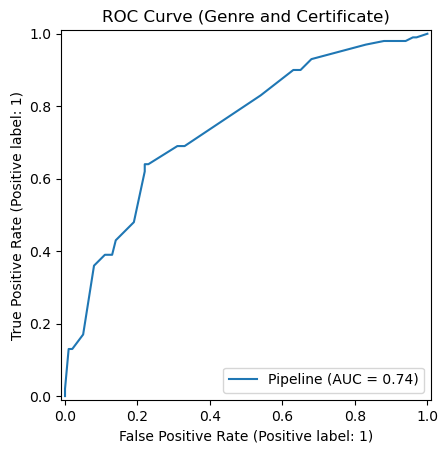

In [39]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Define success criteria (Hit or Flop based on Gross revenue threshold)
threshold = data['Gross'].median()  # Median gross revenue as threshold
data['Success'] = (data['Gross'] >= threshold).astype(int)  # 1 for Hit, 0 for Flop

# Select features (Genre and Certificate) and target variable
X = data[['Genre_1', 'Certificate']]  # Features
y = data['Success']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing pipeline for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # Handle unknown values gracefully

# Apply transformations to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, ['Genre_1', 'Certificate'])  # One-hot encode these features
    ]
)

# Build a pipeline with preprocessing and RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nROC-AUC Score:")
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(roc_auc)

# Plot ROC Curve
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.title("ROC Curve (Genre and Certificate)")
plt.show()


## Algorithm for finding which movie is successful or not

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Define success criteria (Hit or Flop based on Gross revenue threshold)
threshold = data['Gross'].median()  # Median gross revenue as threshold
data['Success'] = (data['Gross'] >= threshold).astype(int)  # 1 for Hit, 0 for Flop

# Select features (Genre and Certificate) and target variable
X = data[['Genre_1', 'Certificate']]  # Features
y = data['Success']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing pipeline for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # Handle unknown values gracefully

# Apply transformations to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, ['Genre_1', 'Certificate'])  # One-hot encode these features
    ]
)

# Build a pipeline with preprocessing and RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Function to predict movie success based on user input
def predict_movie_success(genre, certificate):
    # Create a DataFrame for the input
    input_data = pd.DataFrame({'Genre_1': [genre], 'Certificate': [certificate]})
    
    # Make a prediction
    prediction = pipeline.predict(input_data)[0]
    prediction_proba = pipeline.predict_proba(input_data)[0][1]  # Probability of success (Hit)
    
    # Return the result
    if prediction == 1:
        result = f"The movie is predicted to be a SUCCESS with a probability of {prediction_proba:.2f}."
    else:
        result = f"The movie is predicted to be a FLOP with a probability of {1 - prediction_proba:.2f}."
    
    return result

# Example Usage
print("Enter the movie's genre and certificate to predict its success:")
user_genre = input("Genre (e.g., Action, Drama, Comedy): ")
user_certificate = input("Certificate (e.g., PG, R, G): ")

# Call the function with user inputs
result = predict_movie_success(user_genre, user_certificate)
print(result)


Enter the movie's genre and certificate to predict its success:


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Define success criteria (Hit or Flop based on Gross revenue threshold)
threshold = data['Gross'].median()  # Median gross revenue as threshold
data['Success'] = (data['Gross'] >= threshold).astype(int)  # 1 for Hit, 0 for Flop

# Select features (Genre and Certificate) and target variable
X = data[['Genre_1', 'Certificate']]  # Features
y = data['Success']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing pipeline for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # Handle unknown values gracefully

# Apply transformations to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, ['Genre_1', 'Certificate'])  # One-hot encode these features
    ]
)

# Build a pipeline with preprocessing and RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Function to predict movie success and generate an ROC curve
def predict_movie_success_with_roc(genre, certificate):
    # Create a DataFrame for the input
    input_data = pd.DataFrame({'Genre_1': [genre], 'Certificate': [certificate]})
    
    # Make a prediction
    prediction = pipeline.predict(input_data)[0]
    prediction_proba = pipeline.predict_proba(input_data)[0][1]  # Probability of success (Hit)
    
    # Evaluate the model on test data and generate ROC curve
    RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
    plt.title(f"ROC Curve for Input: Genre={genre}, Certificate={certificate}")
    plt.show()
    
    # Return the result
    if prediction == 1:
        result = f"The movie is predicted to be a SUCCESS with a probability of {prediction_proba:.2f}."
    else:
        result = f"The movie is predicted to be a FLOP with a probability of {1 - prediction_proba:.2f}."
    
    return result

# Example Usage
print("Enter the movie's genre and certificate to predict its success:")
user_genre = input("Genre (e.g., Action, Drama, Comedy): ")
user_certificate = input("Certificate (e.g., PG, R, G): ")

# Call the function with user inputs
result = predict_movie_success_with_roc(user_genre, user_certificate)
print(result)

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Define success criteria based on IMDb Rating and Meta Score
imdb_threshold = data['IMDB_Rating'].median()  # Median IMDb Rating as threshold
meta_threshold = data['Meta_score'].median()   # Median Meta Score as threshold
data['Success'] = ((data['IMDB_Rating'] >= imdb_threshold) & (data['Meta_score'] >= meta_threshold)).astype(int)

# Select features (Genre and Certificate) and target variable
X = data[['Genre_1', 'Certificate']]  # Features
y = data['Success']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing pipeline for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # Handle unknown values gracefully

# Apply transformations to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, ['Genre_1', 'Certificate'])  # One-hot encode these features
    ]
)

# Build a pipeline with preprocessing and RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Function to predict movie success and generate an ROC curve
def predict_movie_success_with_roc(genre, certificate):
    # Create a DataFrame for the input
    input_data = pd.DataFrame({'Genre_1': [genre], 'Certificate': [certificate]})
    
    # Make a prediction
    prediction = pipeline.predict(input_data)[0]
    prediction_proba = pipeline.predict_proba(input_data)[0][1]  # Probability of success (Hit)
    
    # Evaluate the model on test data and generate ROC curve
    RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
    plt.title(f"ROC Curve for Input: Genre={genre}, Certificate={certificate}")
    plt.show()
    
    # Return the result
    if prediction == 1:
        result = f"The movie is predicted to be a SUCCESS with a probability of {prediction_proba:.2f}."
    else:
        result = f"The movie is predicted to be NOT SUCCESSFUL with a probability of {1 - prediction_proba:.2f}."
    
    return result

# Example Usage
print("Enter the movie's genre and certificate to predict its success:")
user_genre = input("Genre (e.g., Action, Drama, Comedy): ")
user_certificate = input("Certificate (e.g., PG, R, G): ")

# Call the function with user inputs
result = predict_movie_success_with_roc(user_genre, user_certificate)
print(result)


## Applying PCA on the dataset

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Select numeric features for PCA
features = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime']
numeric_data = data[features].dropna()  # Drop rows with missing values

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to the dataframe
numeric_data['PC1'] = pca_result[:, 0]
numeric_data['PC2'] = pca_result[:, 1]

# Visualize the explained variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance)
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=numeric_data, hue=data['Genre_1'][:len(numeric_data)], palette='viridis', legend='full')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Select numeric features for PCA
features = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime']
numeric_data = data[features].dropna()  # Drop rows with missing values

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA
pca = PCA(n_components=len(features))  # Keep all components
pca_result = pca.fit_transform(scaled_data)

# Screeplot: Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(features)+1), explained_variance, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(features)+1), np.cumsum(explained_variance), where='mid', label='Cumulative Explained Variance')
plt.xticks(range(1, len(features)+1), [f'PC{i}' for i in range(1, len(features)+1)])
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Screeplot: Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()

# Biplot: First two principal components
def biplot(scores, coeffs, feature_names, pc_x=0, pc_y=1):
    """
    Create a Biplot with the first two principal components.

    Args:
    - scores: The PCA-transformed data.
    - coeffs: PCA component coefficients (loadings).
    - feature_names: List of feature names.
    - pc_x, pc_y: Indices of the principal components to plot.
    """
    plt.figure(figsize=(10, 8))

    # Scatter plot of scores
    plt.scatter(scores[:, pc_x], scores[:, pc_y], alpha=0.6, edgecolors='k')

    # Feature vectors
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, coeffs[i, pc_x]*2, coeffs[i, pc_y]*2, color='red', alpha=0.8, head_width=0.05)
        plt.text(coeffs[i, pc_x]*2.2, coeffs[i, pc_y]*2.2, feature, color='black', ha='center', va='center')

    plt.xlabel(f'Principal Component {pc_x + 1}')
    plt.ylabel(f'Principal Component {pc_y + 1}')
    plt.title('Biplot: First Two Principal Components')
    plt.grid()
    plt.show()

# Call the biplot function
biplot(pca_result, pca.components_.T, features)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Select numeric features for PCA
features = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime']
numeric_data = data[features].dropna()  # Drop rows with missing values

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA
pca = PCA(n_components=len(features))  # Keep all components
pca_result = pca.fit_transform(scaled_data)

# Screeplot: Variance explained by each principal component (Scatter Plot)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))

# Scatter plot for individual explained variance
plt.scatter(range(1, len(features) + 1), explained_variance, color='blue', label='Individual Explained Variance', s=100)
plt.plot(range(1, len(features) + 1), explained_variance, color='blue', linestyle='--')

# Scatter plot for cumulative explained variance
plt.scatter(range(1, len(features) + 1), cumulative_variance, color='red', label='Cumulative Explained Variance', s=100)
plt.plot(range(1, len(features) + 1), cumulative_variance, color='red', linestyle='--')

plt.xticks(range(1, len(features) + 1), [f'PC{i}' for i in range(1, len(features) + 1)])
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Screeplot: Explained Variance by Principal Components (Scatter Plot)')
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Select numeric features for PCA
features = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime']
numeric_data = data[features].dropna()  # Drop rows with missing values

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Genre_1'] = data['Genre_1'].iloc[numeric_data.index]  # Add genre labels for hover info

# Interactive 3D Biplot
def interactive_biplot_3d(scores, coeffs, feature_names):
    """
    Create an interactive 3D Biplot using Plotly.

    Args:
    - scores: PCA-transformed data (scores).
    - coeffs: PCA component coefficients (loadings).
    - feature_names: List of feature names.
    """
    fig = go.Figure()

    # Add scatter plot for PCA-transformed data
    fig.add_trace(go.Scatter3d(
        x=scores[:, 0],
        y=scores[:, 1],
        z=scores[:, 2],
        mode='markers',
        marker=dict(size=5, color=scores[:, 0], colorscale='Viridis', opacity=0.7),
        text=pca_df['Genre_1'],  # Hover information
        name='Movies'
    ))

    # Add arrows (vectors) for feature contributions
    for i, feature in enumerate(feature_names):
        fig.add_trace(go.Scatter3d(
            x=[0, coeffs[i, 0] * 3],
            y=[0, coeffs[i, 1] * 3],
            z=[0, coeffs[i, 2] * 3],
            mode='lines+text',
            line=dict(color='red', width=4),
            text=[None, feature],
            textposition='top center',
            name=f'Feature: {feature}'
        ))

    # Set layout
    fig.update_layout(
        title='Interactive 3D Biplot: First Three Principal Components',
        scene=dict(
            xaxis_title='Principal Component 1',
            yaxis_title='Principal Component 2',
            zaxis_title='Principal Component 3'
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )

    # Show plot
    fig.show()

# Call the function
interactive_biplot_3d(pca_result, pca.components_.T, features)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score, classification_report

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Feature Selection
features = ['Genre_1', 'Certificate', 'Overview']
target_regression = 'Gross'  # Predict gross revenue
target_classification = 'IMDB_Rating'  # Predict IMDb success

# Define success threshold for IMDb_Rating
data['IMDB_Success'] = (data['IMDB_Rating'] >= data['IMDB_Rating'].median()).astype(int)

# Drop rows with missing data in relevant columns
data = data.dropna(subset=features + [target_regression, target_classification])

# Train-test split
X = data[features]
y_regression = data[target_regression]  # For gross prediction
y_classification = data['IMDB_Success']  # For IMDb success classification

X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
_, _, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre_1', 'Certificate']),  # Encode categorical data
        ('text', TfidfVectorizer(max_features=500), 'Overview')  # TF-IDF for Overview
    ]
)

# Regression Pipeline (Gross Prediction)
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Classification Pipeline (IMDB Rating Success)
classification_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train Regression Model
regression_pipeline.fit(X_train, y_train_reg)

# Train Classification Model
classification_pipeline.fit(X_train, y_train_class)

# Predictions
y_pred_reg = regression_pipeline.predict(X_test)
y_pred_class = classification_pipeline.predict(X_test)

# Evaluate Regression
print("Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")
print(f"R² Score: {r2_score(y_test_reg, y_pred_reg):.2f}")

# Evaluate Classification
print("\nClassification Results:")
print(classification_report(y_test_class, y_pred_class))

# Predict New Data Example
example = pd.DataFrame({
    'Genre_1': ['Drama'],
    'Certificate': ['R'],
    'Overview': ['Love hate']
})

gross_prediction = regression_pipeline.predict(example)[0]
imdb_success_prediction = classification_pipeline.predict(example)[0]

print(f"\nPredicted Gross Revenue: ${gross_prediction:.2f}")
print(f"Predicted IMDb Success: {'Successful' if imdb_success_prediction == 1 else 'Not Successful'}")


In [ ]:
gross_stats = data['Gross'].describe()
print(gross_stats)


In [ ]:
gross_stats = data['IMDB_Rating'].describe()
print(gross_stats)


In [ ]:
gross_stats = data['No_of_Votes'].describe()
print(gross_stats)

In [ ]:
gross_stats = data['Meta_score'].describe()
print(gross_stats)

## Movie recommendation system:

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Combine features into a single string for similarity calculation
data['combined_features'] = (
    data['Genre_1'] + " " +
    data['Certificate'] + " " +
    data['Director'] + " " +
    data['IMDB_Rating'].astype(str)
)

# Convert combined features into a numerical vector using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
feature_matrix = vectorizer.fit_transform(data['combined_features'])

# Compute cosine similarity between all movies
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

# Function to get recommendations
def recommend_movies(movie_title, data, cosine_sim, top_n=5):
    # Find the index of the given movie
    indices = pd.Series(data.index, index=data['Series_Title']).drop_duplicates()
    if movie_title not in indices:
        return f"Movie '{movie_title}' not found in the dataset."
    
    movie_idx = indices[movie_title]
    
    # Get similarity scores for all movies with the given movie
    sim_scores = list(enumerate(cosine_sim[movie_idx]))
    
    # Sort by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of top n movies (excluding the movie itself)
    top_indices = [i[0] for i in sim_scores[1:top_n + 1]]
    
    # Return the titles of the top-n similar movies
    return data['Series_Title'].iloc[top_indices]

# Test the recommendation system
movie_to_search = "The Shawshank Redemption"
recommendations = recommend_movies(movie_to_search, data, cosine_sim, top_n=5)

print(f"Movies similar to '{movie_to_search}':")
print(recommendations)


## Movie success algorith for predicting Gross revenue based on the genre and certificate 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Select relevant columns
features = ['Genre_1', 'Certificate']
target = 'Gross'

# Drop rows with missing values in target
data = data.dropna(subset=[target])

# Train-test split
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: One-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre_1', 'Certificate'])
    ]
)

# Define the regression model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
])

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Predict for a new movie
new_movie = pd.DataFrame({'Genre_1': ['Drama'], 'Certificate': ['R']})
gross_prediction = model.predict(new_movie)[0]
print(f"Predicted Gross Revenue: ${gross_prediction:.2f}")


In [ ]:
pip install xgboost


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Feature engineering
data['Gross'] = np.log1p(data['Gross'])  # Log transform the target
features = ['Genre_1', 'Certificate', 'Runtime', 'IMDB_Rating', 'Meta_score']
data = data.dropna(subset=features + ['Gross'])

# Train-test split
X = data[features]
y = data['Gross']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre_1', 'Certificate']),
        ('num', StandardScaler(), ['Runtime', 'IMDB_Rating', 'Meta_score'])
    ]
)

# Model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, n_estimators=500))
])

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))  # Inverse log transform
mae = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Predict for a new movie
new_movie = pd.DataFrame({'Genre_1': ['Drama'], 'Certificate': ['R'], 
                          'Runtime': [120], 'IMDB_Rating': [8.5], 'Meta_score': [90]})
gross_prediction = np.expm1(model.predict(new_movie)[0])  # Inverse log transform
print(f"Predicted Gross Revenue: ${gross_prediction:.2f}")


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load and preprocess
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')
data['Gross'] = np.log1p(data['Gross'])  # Log transform target
data = data.dropna(subset=['Gross', 'Genre_1', 'Certificate'])

# Define features and target
X = data[['Genre_1', 'Certificate', 'IMDB_Rating', 'Runtime']]
y = data['Gross']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre_1', 'Certificate']),
        ('num', StandardScaler(), ['IMDB_Rating', 'Runtime'])
    ]
)

# Define pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=500))
])

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
print(f"Adjusted Mean Squared Error: {mse:.2f}")


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Combine features into a single string for similarity calculation
data['combined_features'] = (
    data['Genre_1'].fillna('') + " " +
    data['Certificate'].fillna('') + " " +
    data['Director'].fillna('') + " " +
    data['IMDB_Rating'].astype(str)
)

# Vectorize the combined features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
feature_matrix = vectorizer.fit_transform(data['combined_features'])

# Compute cosine similarity between all movies
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

# Function to recommend movies based on a given title
def recommend_movies(movie_title, data, cosine_sim, top_n=5):
    # Get the index of the movie that matches the title
    indices = pd.Series(data.index, index=data['Series_Title']).drop_duplicates()
    if movie_title not in indices:
        return f"Movie '{movie_title}' not found in the dataset."
    
    movie_idx = indices[movie_title]
    
    # Get similarity scores for all movies
    sim_scores = list(enumerate(cosine_sim[movie_idx]))
    
    # Sort by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top-n similar movies (excluding the input movie)
    top_indices = [i[0] for i in sim_scores[1:top_n + 1]]
    
    # Return the titles of the recommended movies
    return data['Series_Title'].iloc[top_indices].tolist()

# Test the recommendation system
movie_to_search = "The Shawshank Redemption"
recommendations = recommend_movies(movie_to_search, data, cosine_sim, top_n=5)

print(f"Movies similar to '{movie_to_search}':")
for idx, movie in enumerate(recommendations, 1):
    print(f"{idx}. {movie}")


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data = pd.read_csv('imdb_1000_final_with_correct_certificate.csv')

# Combine features into a single string for similarity calculation
data['combined_features'] = (
    data['Genre_1'].fillna('') + " " +
    data['Certificate'].fillna('') + " " +
    data['IMDB_Rating'].astype(str)
)

# Vectorize the combined features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
feature_matrix = vectorizer.fit_transform(data['combined_features'])

# Function to recommend movies based on Genre, Certificate, and IMDb Rating
def recommend_movies_by_criteria(genre, certificate, imdb_rating, data, feature_matrix, top_n=5):
    # Create a combined input string for the user's criteria
    input_features = f"{genre} {certificate} {imdb_rating}"
    
    # Vectorize the input features
    input_vector = vectorizer.transform([input_features])
    
    # Compute similarity between the input and all movies in the dataset
    sim_scores = cosine_similarity(input_vector, feature_matrix).flatten()
    
    # Get the indices of the top-n most similar movies
    top_indices = sim_scores.argsort()[-top_n:][::-1]
    
    # Return the titles of the recommended movies
    return data['Series_Title'].iloc[top_indices].tolist()

# Test the recommendation system with user-defined criteria
genre_input = "Drama"
certificate_input = "G"
imdb_rating_input = 6  # Example IMDb rating input

recommendations = recommend_movies_by_criteria(
    genre=genre_input, 
    certificate=certificate_input, 
    imdb_rating=imdb_rating_input, 
    data=data, 
    feature_matrix=feature_matrix, 
    top_n=5
)

print(f"Movies similar to Genre: '{genre_input}', Certificate: '{certificate_input}', IMDb Rating: {imdb_rating_input}:")
for idx, movie in enumerate(recommendations, 1):
    print(f"{idx}. {movie}")
